# Imports & Helpers
This section contains the imports for libraries and data as well as helper methods used to create the visualizations below.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import altair as alt
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

# Set the altair theme
def my_theme(*args, **kwargs):
    return {'config': {'axis': {'labelFontSize': 20, 'titleFontSize': 20}}}
alt.themes.register('my-chart', my_theme)
alt.themes.enable('my-chart')

ThemeRegistry.enable('my-chart')

In [2]:
def plot_active_users(courses, names):
    colors = sns.color_palette("Paired")
    
    plt.figure(figsize=(20,5))
    plt.title("Unique Users", fontsize=18, pad=20)
    plt.xlabel('Date')
    plt.ylabel('# of Unique Users', fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Active Users'], color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [3]:
def plot_active_users_annotations(course, name, annotations):    
    plt.figure(figsize=(20,5))
    plt.title("Unique Users", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Unique Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color="cornflowerblue", label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [4]:
def plot_active_users_single(course, name):    
    plt.figure(figsize=(20,5))
    plt.title("Unique Users", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Unique Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color="cornflowerblue", label=str(name))

    plt.legend()
    plt.show()

In [5]:
def plot_cpu(courses, names, memory=False):
    colors = sns.color_palette("Paired")
    
    string = "Memory Usage (GB)" if memory else "CPU"
    
    plt.figure(figsize=(20,5))
    plt.title(string, fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(string, fontsize=14)

    for i in range(len(courses)):
        values = (courses[i]['Value'] * 1.0 / (2 ** 30)) if memory else courses[i]['Value']
        plt.plot(courses[i]['Time'], values, color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [6]:
def plot_cpu_single(course, name, memory=False):
    string = "Memory Usage (GB)" if memory else "CPU"
    
    plt.figure(figsize=(20,5))
    plt.title(string, fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(string, fontsize=14)
    values = (course['Value'] * 1.0 / (2 ** 30)) if memory else course['Value']
    plt.plot(course['Time'], values, color="cornflowerblue", label=str(name))

    plt.legend()
    plt.show()

In [7]:
def plot_cpu_annotations(course, name, annotations):      
    plt.figure(figsize=(20,5))
    plt.title("CPU", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("CPU", fontsize=14)
    plt.plot(course['Time'], course['Value'], color="cornflowerblue", label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [8]:
def plot_memory_annotations(course, name, annotations):      
    plt.figure(figsize=(20,5))
    plt.title("Memory Usage (GB)", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Memory Usage (GB)", fontsize=14)
    plt.plot(course['Time'], course['Value'] * 1.0 / (2 ** 30), color="cornflowerblue", label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [9]:
def split_fasp(dataset):
    dataset['Time'] = pd.to_datetime(dataset['Time'])
    return [dataset[dataset['Time'] < datetime(2020, 12, 31)], dataset[dataset['Time'] > datetime(2020, 12, 31)]]

In [10]:
def return_active_users(dataset, date):
    return dataset[dataset['Time'] == date]['Active Users']

In [11]:
def return_value(dataset, date):
    return dataset[dataset['Time'] == date]['Value']

# Users
This section visualizes the number of unique users at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

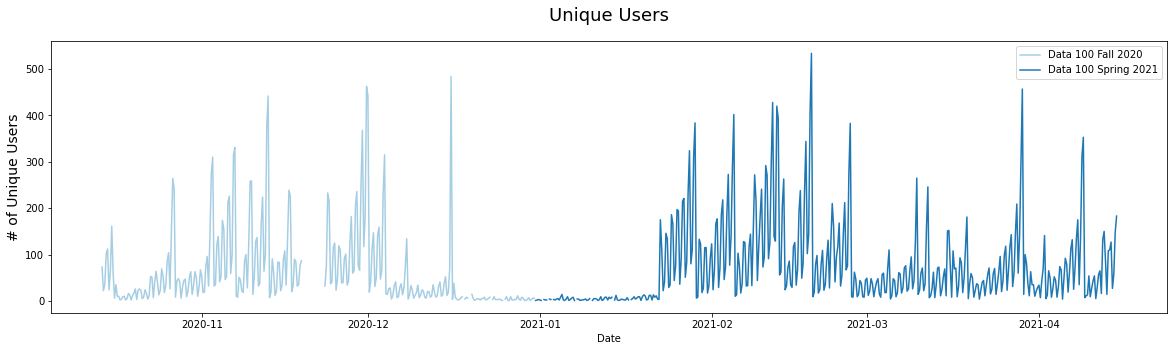

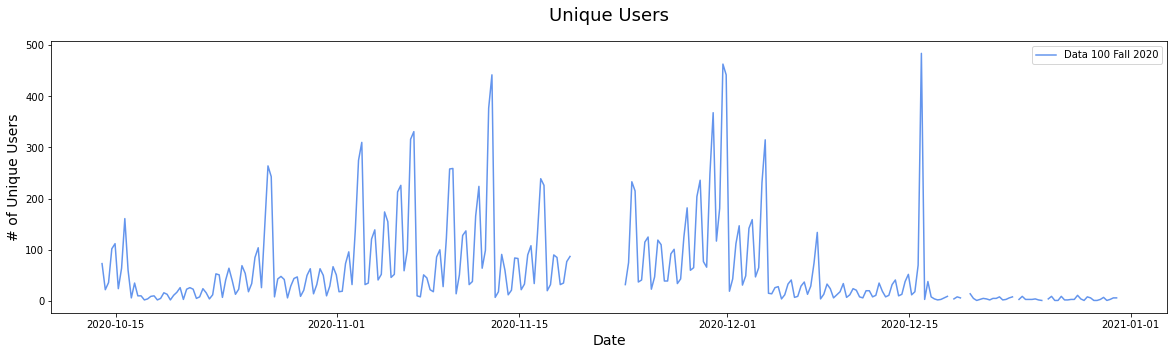

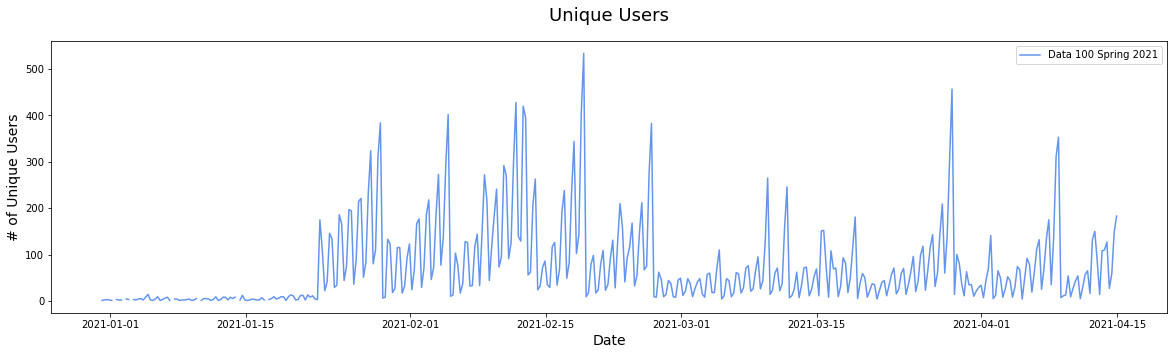

In [12]:
data100_path = '../data/grafana/data100hub/'
data100_users = pd.read_csv(data100_path + "data100_users.csv")

courses = split_fasp(data100_users)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

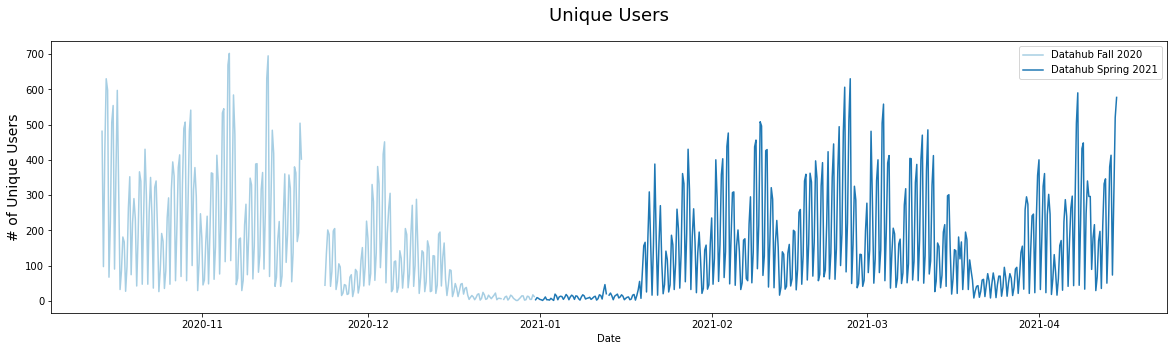

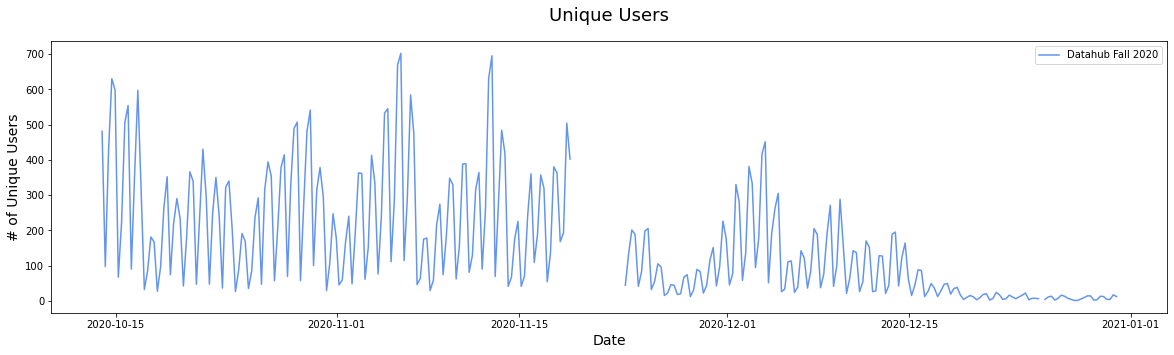

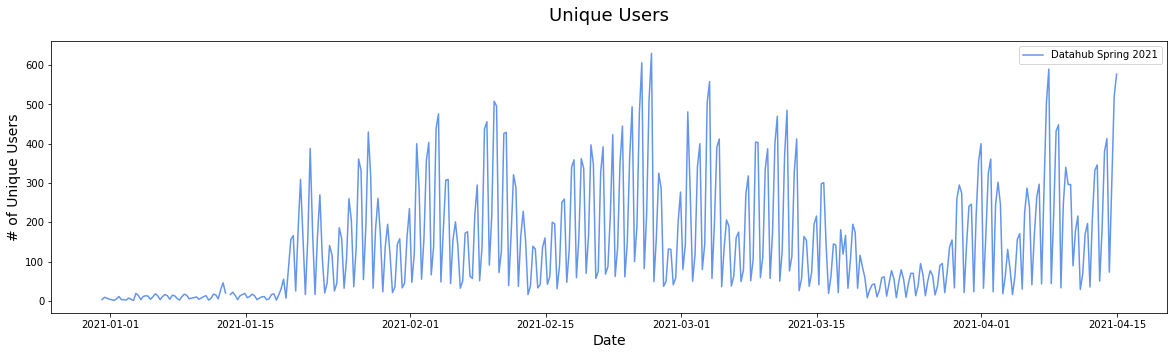

In [13]:
datahub_path = '../data/grafana/datahub/'
datahub_users = pd.read_csv(datahub_path + "datahub_users.csv")

courses = split_fasp(datahub_users)
names = ["Datahub Fall 2020", "Datahub Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

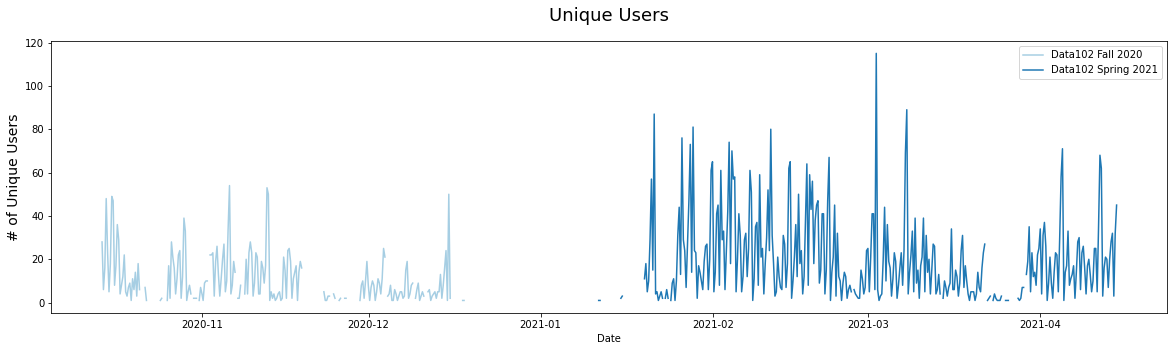

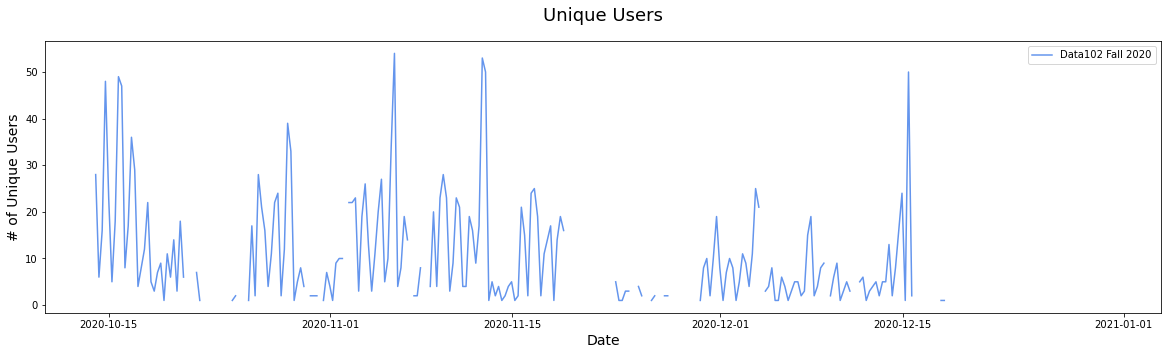

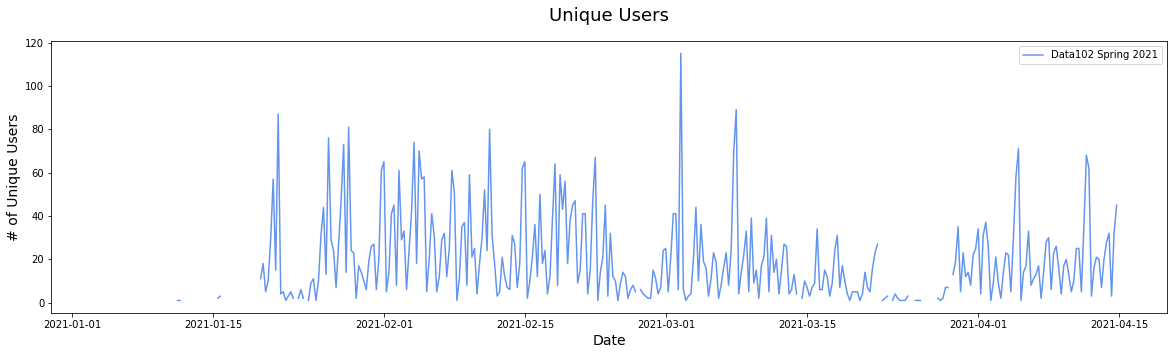

In [14]:
data102_path = '../data/grafana/data102hub/'
data102_users = pd.read_csv(data102_path + "data102_users.csv")

courses = split_fasp(data102_users)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

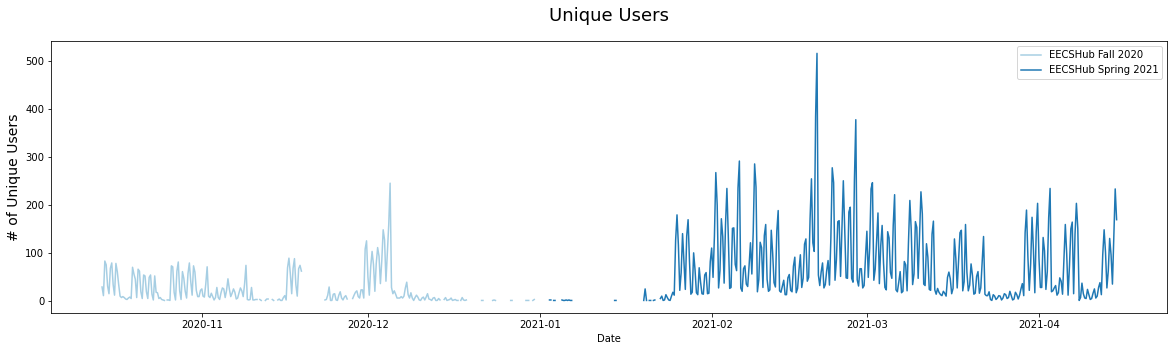

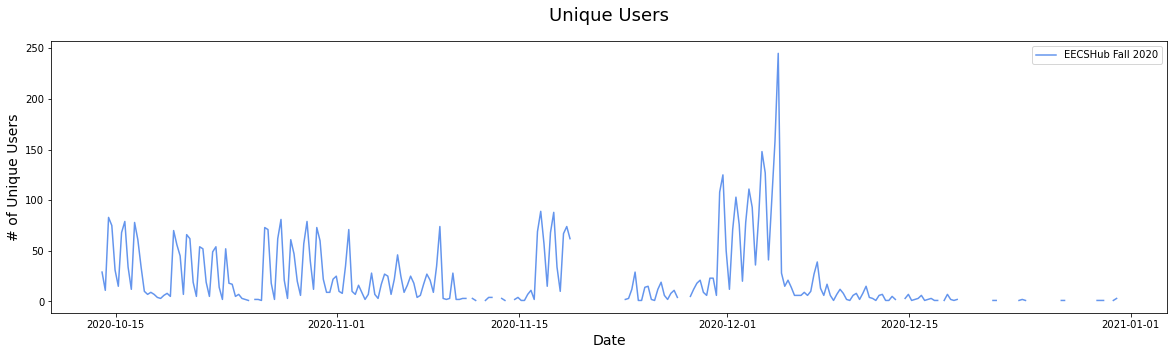

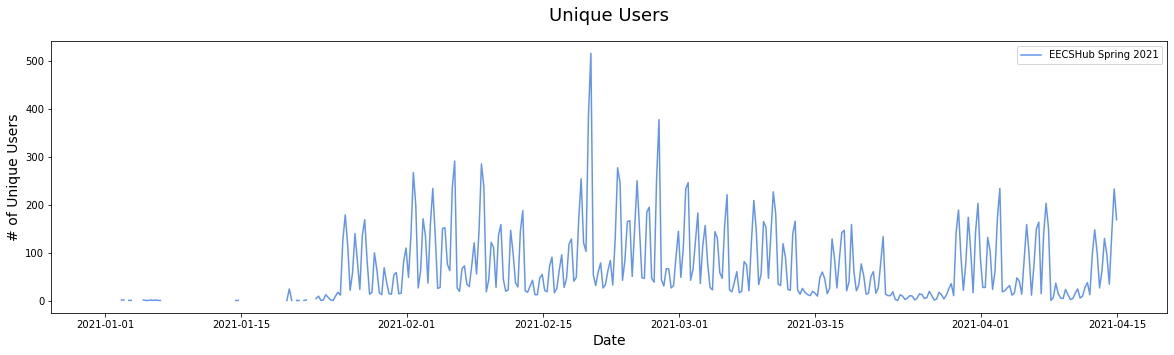

In [15]:
eecs_path = '../data/grafana/eecshub/'
eecs_users = pd.read_csv(eecs_path + "eecs_users.csv")

courses = split_fasp(eecs_users)
names = ["EECSHub Fall 2020", "EECSHub Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

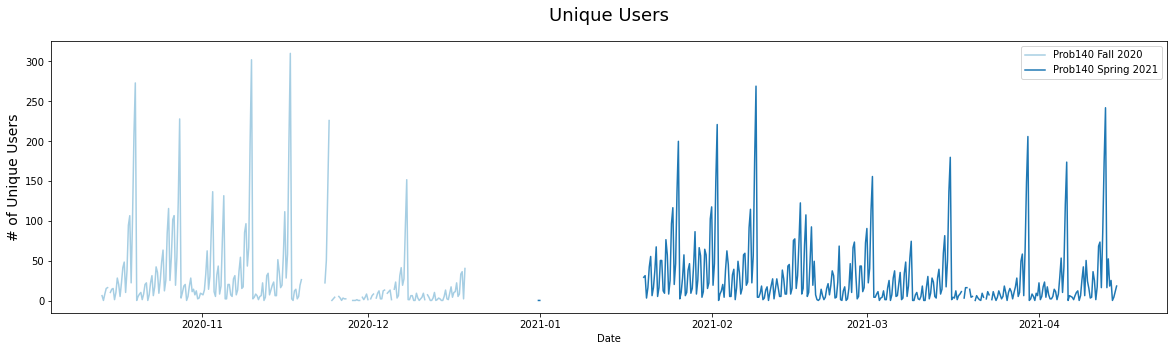

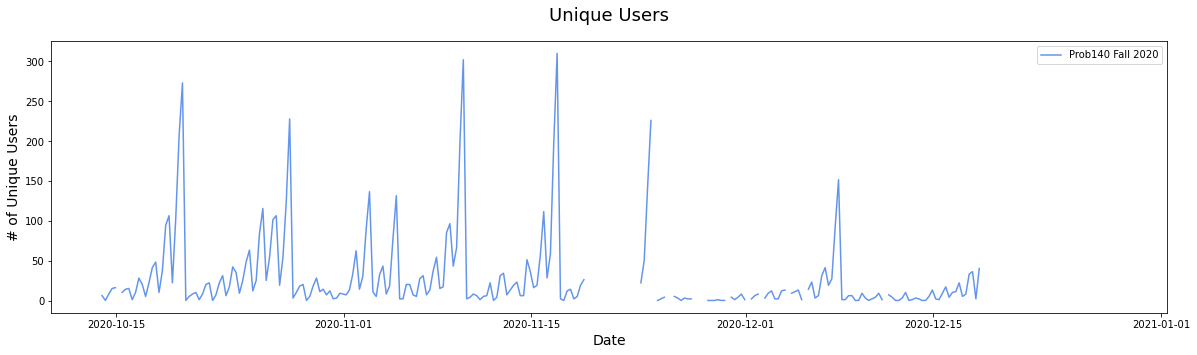

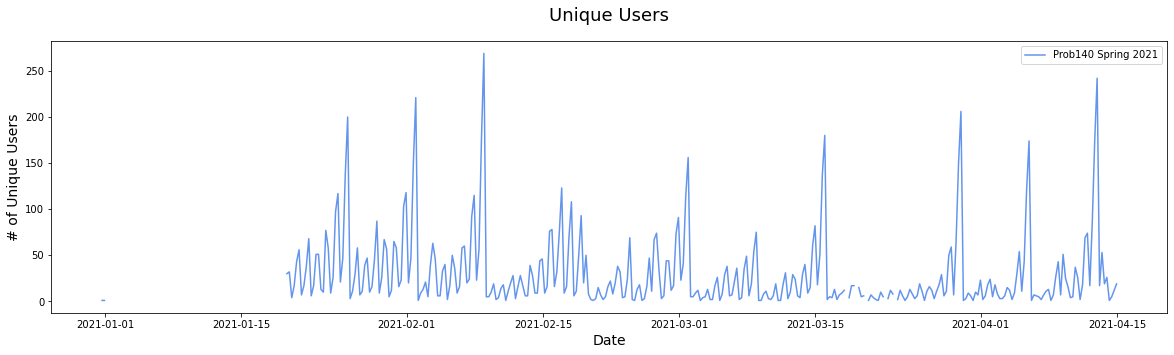

In [16]:
prob140_path = '../data/grafana/prob140hub/'
prob140_users = pd.read_csv(prob140_path + "prob140_users.csv")

courses = split_fasp(prob140_users)
names = ["Prob140 Fall 2020", "Prob140 Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

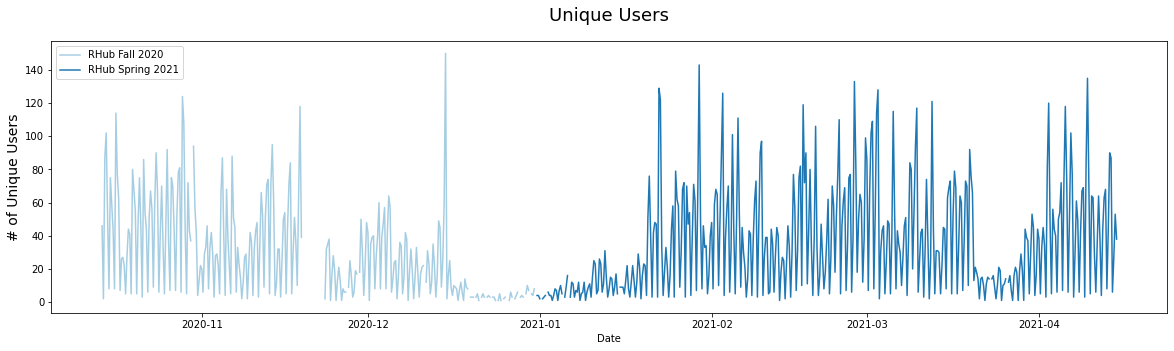

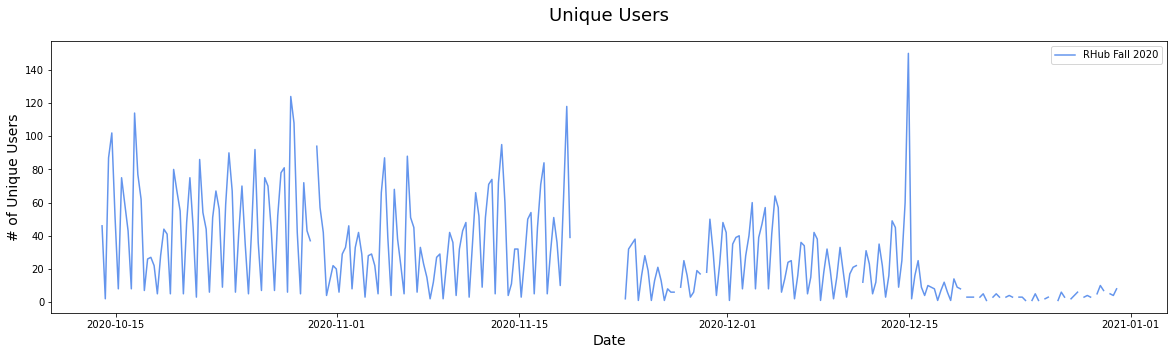

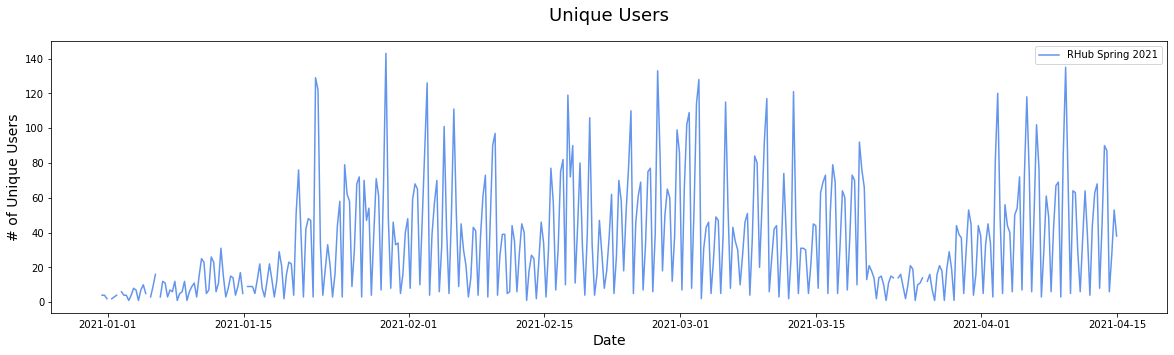

In [17]:
rhub_path = '../data/grafana/rhub/'
rhub_users = pd.read_csv(rhub_path + "rhub_users.csv")

courses = split_fasp(rhub_users)
names = ["RHub Fall 2020", "RHub Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

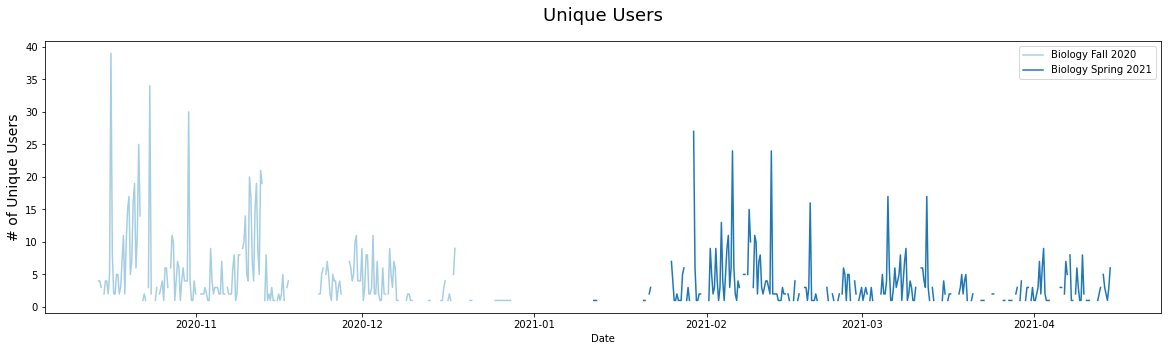

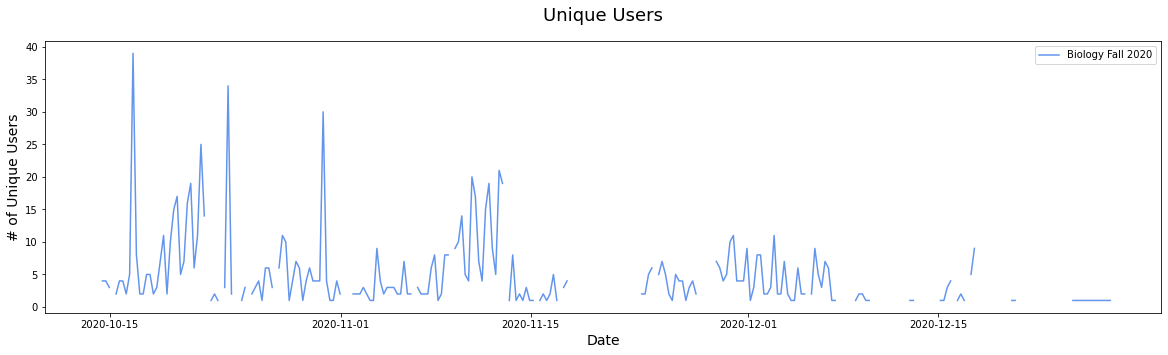

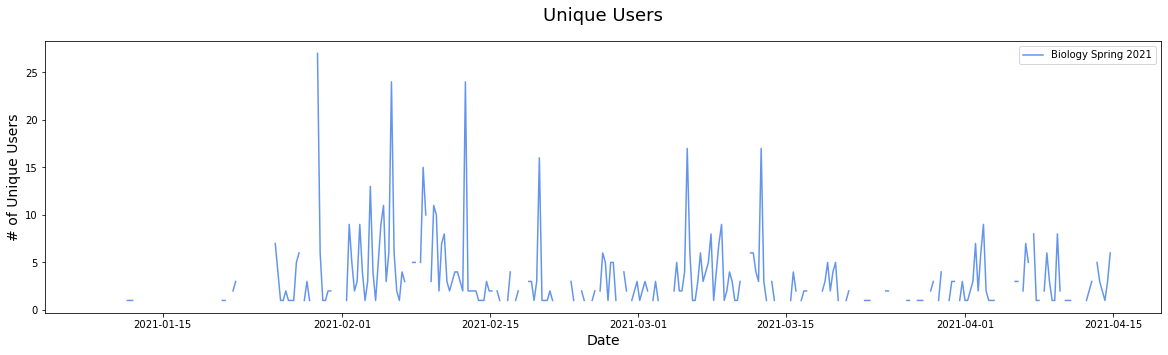

In [18]:
biology_path = '../data/grafana/biology/'
biology_users = pd.read_csv(biology_path + "biology_users.csv")

courses = split_fasp(biology_users)
names = ["Biology Fall 2020", "Biology Spring 2021"]

plot_active_users(courses, names)
plot_active_users_single(courses[0], names[0])
plot_active_users_single(courses[1], names[1])

<ipython-input-19-d0ee35967346>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  courses = np.array([item for sublist in agg for item in sublist])


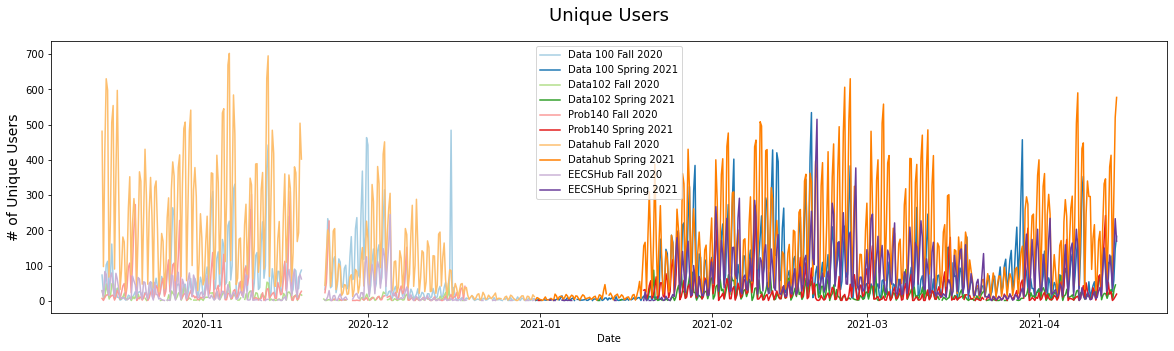

In [19]:
# Please note that we're not plotting RHub or Biology Hub on this graph since their values are so small that they don't show up
agg = split_fasp(data100_users), split_fasp(data102_users), split_fasp(prob140_users), split_fasp(datahub_users), split_fasp(eecs_users) # split_fasp(rhub_cpu), split_fasp(biology_cpu)
courses = np.array([item for sublist in agg for item in sublist])
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_active_users(courses, names)

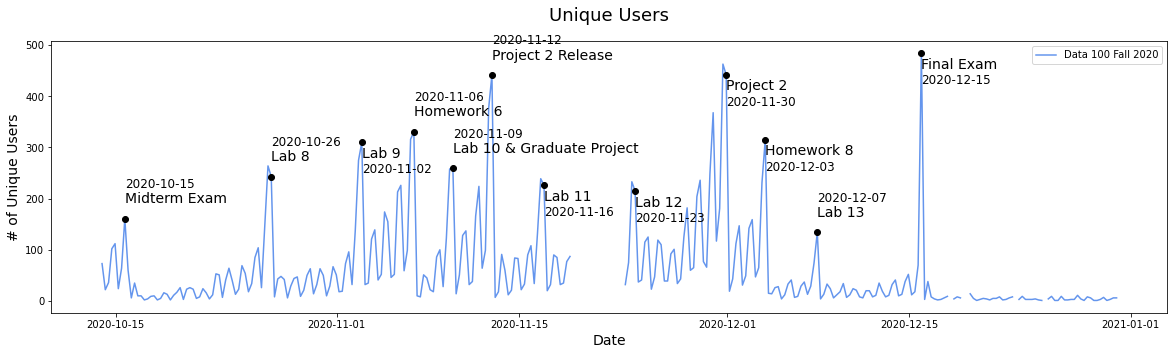

In [20]:
data100_dates = [ 
    datetime(2020, 10, 15, 17, 0, 0), datetime(2020, 10, 26, 23, 0, 0), datetime(2020, 11, 2, 22, 0, 0), 
    datetime(2020, 11, 6, 22, 0, 0), datetime(2020, 11, 9, 22, 0, 0), datetime(2020, 11, 12, 22, 0, 0), 
    datetime(2020, 11, 16, 22, 0, 0), datetime(2020, 11, 23, 22, 0, 0), datetime(2020, 11, 30, 22, 0, 0), 
    datetime(2020, 12, 3, 22, 0, 0), datetime(2020, 12, 7, 22, 0, 0), datetime(2020, 12, 15, 22, 0, 0)
]
data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_active_users(data100_users, date) for date in data100_dates],
    'label': ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Project 2 Release', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam'],
    'offset': [30, 30, -30, 30, 30, 30, -30, -30, -30, -30, 30, -30]
})

plot_active_users_annotations(courses[0], names[0], data100_annotations)

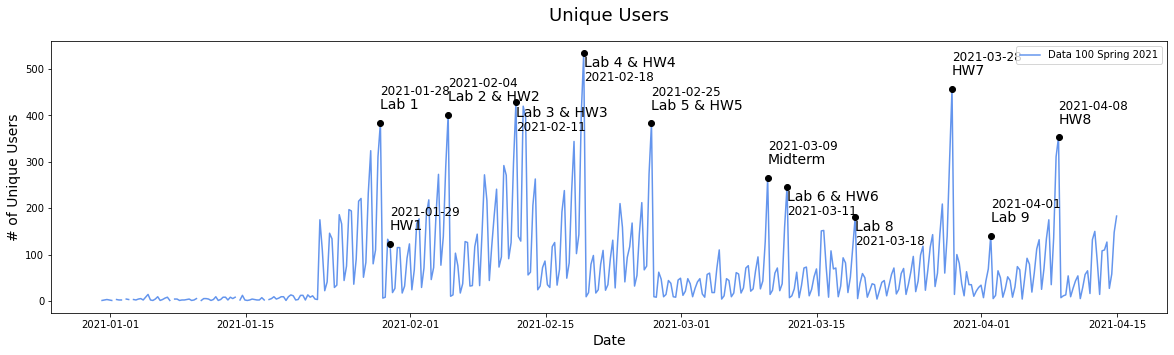

In [21]:
data100_springdates = [ 
    datetime(2021, 1, 28, 22, 0, 0), datetime(2021, 1, 29, 22, 0, 0), datetime(2021, 2, 4, 22, 0, 0),
    datetime(2021, 2, 11, 22, 0, 0), datetime(2021, 2, 18, 22, 0, 0), datetime(2021, 2, 25, 22, 0, 0),
    datetime(2021, 3, 9, 22, 0, 0), datetime(2021, 3, 11, 22, 0, 0), datetime(2021, 3, 18, 23, 0, 0),
    datetime(2021, 3, 28, 23, 0, 0), datetime(2021, 4, 1, 23, 0, 0), datetime(2021, 4, 8, 23, 0, 0)
]
data100_springannotations = pd.DataFrame({
    'x': data100_springdates,
    'y': [return_active_users(data100_users, date) for date in data100_springdates],
    'label': ['Lab 1', 'HW1', 'Lab 2 & HW2', 'Lab 3 & HW3', 'Lab 4 & HW4', 
              'Lab 5 & HW5', 'Midterm', 'Lab 6 & HW6', 'Lab 8', 'HW7', 'Lab 9', 'HW8'],
    'offset': [30, 30, 30, -30, -30, 30, 30, -30, -30, 30, 30, 30]
})

plot_active_users_annotations(courses[1], names[1], data100_springannotations)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


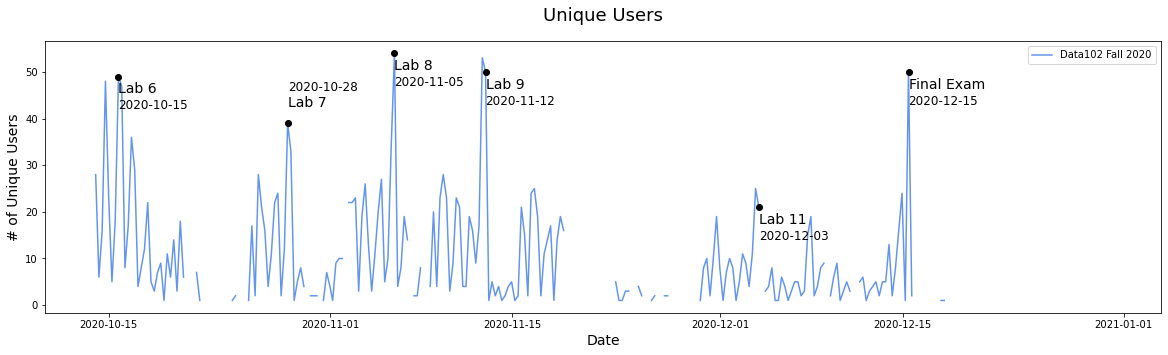

In [22]:
offset = 3.5
data102_fall = [ 
    datetime(2020, 10, 15, 18, 0, 0), datetime(2020, 10, 28, 18, 0, 0), datetime(2020, 11, 5, 23, 0, 0),
    datetime(2020, 11, 12, 23, 0, 0), datetime(2020, 11, 19, 23, 0, 0), datetime(2020, 12, 3, 23, 0, 0),
    datetime(2020, 12, 15, 11, 0, 0)
]
data102_fallannotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_active_users(data102_users, date) for date in data102_fall],
    'label': ['Lab 6', 'Lab 7', 'Lab 8', 'Lab 9', 'Lab 10', 'Lab 11', 'Final Exam'],
    'offset': [-offset, offset, -offset, -offset, -offset, -offset, -offset]
})

plot_active_users_annotations(courses[2], names[2], data102_fallannotations)

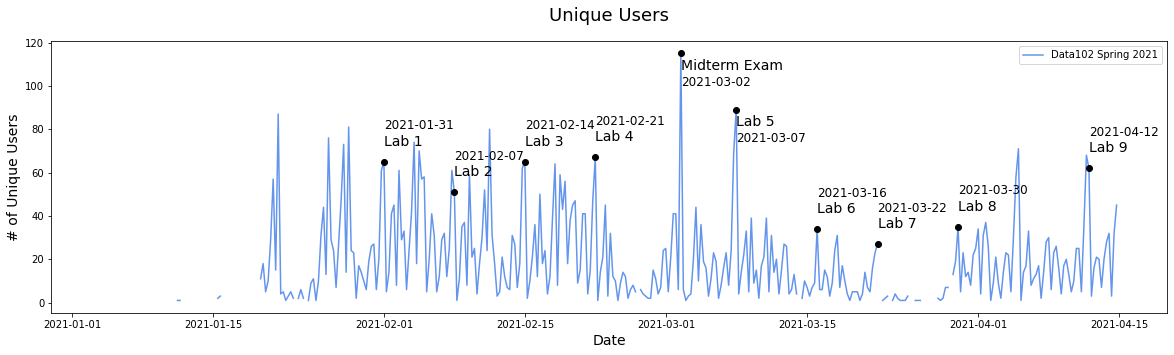

In [23]:
offset = 7.5
data102_spring = [ 
    datetime(2021, 1, 31, 23, 0, 0), datetime(2021, 2, 7, 23, 0, 0), datetime(2021, 2, 14, 23, 0, 0), 
    datetime(2021, 2, 21, 23, 0, 0), datetime(2021, 3, 2, 11, 0, 0), datetime(2021, 3, 7, 23, 0, 0),
    datetime(2021, 3, 16, 0, 0, 0), datetime(2021, 3, 22, 0, 0, 0), datetime(2021, 3, 30, 0, 0, 0),
    datetime(2021, 4, 12, 0, 0, 0)
]
data102_springannotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_active_users(data102_users, date) for date in data102_spring],
    'label': ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4', 'Midterm Exam', 'Lab 5', 'Lab 6', 'Lab 7', 'Lab 8', 'Lab 9'],
    'offset': [offset, offset, offset, offset, -offset, -offset, offset, offset, offset, offset]
})

plot_active_users_annotations(courses[3], names[3], data102_springannotations)

In [24]:
list(datahub_users['Time'])

[Timestamp('2020-10-13 23:00:00'),
 Timestamp('2020-10-14 05:00:00'),
 Timestamp('2020-10-14 11:00:00'),
 Timestamp('2020-10-14 17:00:00'),
 Timestamp('2020-10-14 23:00:00'),
 Timestamp('2020-10-15 05:00:00'),
 Timestamp('2020-10-15 11:00:00'),
 Timestamp('2020-10-15 17:00:00'),
 Timestamp('2020-10-15 23:00:00'),
 Timestamp('2020-10-16 05:00:00'),
 Timestamp('2020-10-16 11:00:00'),
 Timestamp('2020-10-16 17:00:00'),
 Timestamp('2020-10-16 23:00:00'),
 Timestamp('2020-10-17 05:00:00'),
 Timestamp('2020-10-17 11:00:00'),
 Timestamp('2020-10-17 17:00:00'),
 Timestamp('2020-10-17 23:00:00'),
 Timestamp('2020-10-18 05:00:00'),
 Timestamp('2020-10-18 11:00:00'),
 Timestamp('2020-10-18 17:00:00'),
 Timestamp('2020-10-18 23:00:00'),
 Timestamp('2020-10-19 05:00:00'),
 Timestamp('2020-10-19 11:00:00'),
 Timestamp('2020-10-19 17:00:00'),
 Timestamp('2020-10-19 23:00:00'),
 Timestamp('2020-10-20 05:00:00'),
 Timestamp('2020-10-20 11:00:00'),
 Timestamp('2020-10-20 17:00:00'),
 Timestamp('2020-10-

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


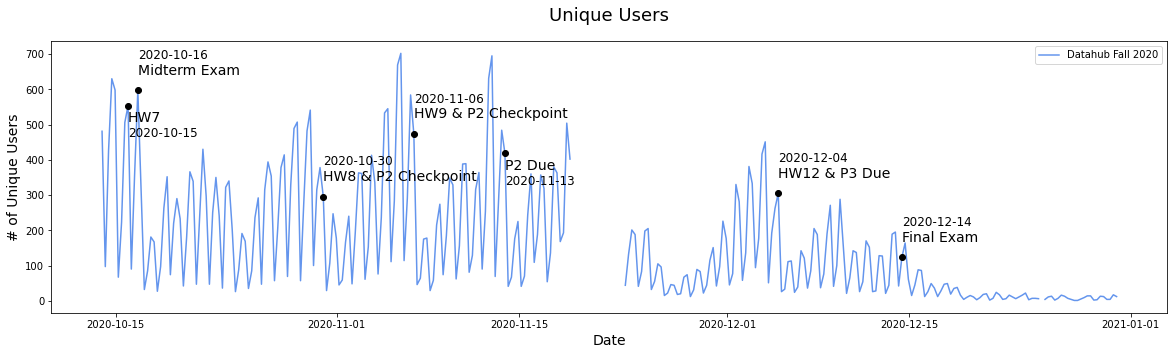

In [25]:
offset = 45
datahub_fall = [ 
    datetime(2020, 10, 15, 23, 0, 0), datetime(2020, 10, 16, 17, 0, 0), datetime(2020, 10, 30, 23, 0, 0),
    datetime(2020, 11, 6, 22, 0, 0), datetime(2020, 11, 13, 22, 0, 0), datetime(2020, 11, 21, 22, 0, 0),
    datetime(2020, 12, 4, 22, 0, 0), datetime(2020, 12, 14, 10, 0, 0)
]
datahub_fallannotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_active_users(datahub_users, date) for date in datahub_fall],
    'label': ['HW7', 'Midterm Exam', 'HW8 & P2 Checkpoint', 'HW9 & P2 Checkpoint', 'P2 Due', 'HW11', 'HW12 & P3 Due', 'Final Exam'],
    'offset': [-offset, offset, offset, offset, -offset, offset, offset, offset]
})

plot_active_users_annotations(courses[6], names[6], datahub_fallannotations)

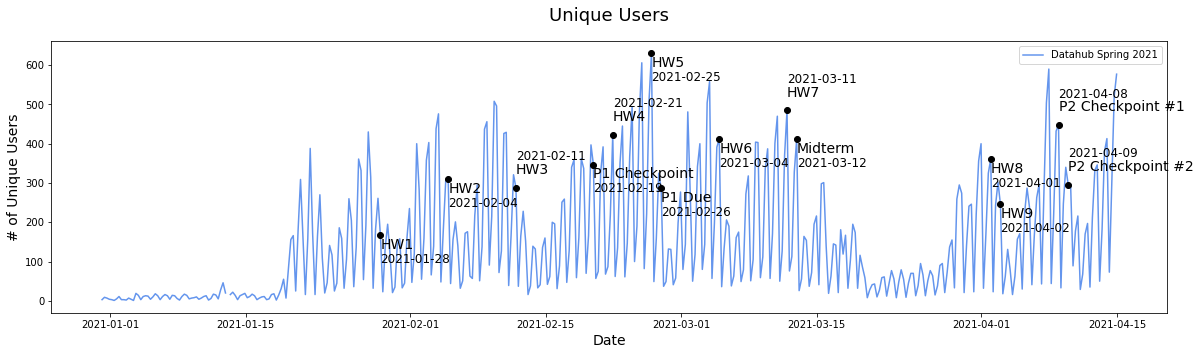

In [26]:
offset = 35
datahub_spring = [ 
    datetime(2021, 1, 28, 22, 0, 0), datetime(2021, 2, 4, 22, 0, 0), datetime(2021, 2, 11, 22, 0, 0),
    datetime(2021, 2, 19, 22, 0, 0), datetime(2021, 2, 21, 22, 0, 0), datetime(2021, 2, 25, 22, 0, 0),
    datetime(2021, 2, 26, 22, 0, 0), datetime(2021, 3, 4, 22, 0, 0), datetime(2021, 3, 11, 22, 0, 0),
    datetime(2021, 3, 12, 22, 0, 0), datetime(2021, 4, 1, 23, 0, 0), datetime(2021, 4, 2, 23, 0, 0),
    datetime(2021, 4, 8, 23, 0, 0), datetime(2021, 4, 9, 23, 0, 0)
]
datahub_springannotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_active_users(datahub_users, date) for date in datahub_spring],
    'label': ['HW1', 'HW2', 'HW3', 'P1 Checkpoint', 'HW4', 'HW5', 'P1 Due', 'HW6', 'HW7', 'Midterm', 'HW8', 'HW9', 'P2 Checkpoint #1', 'P2 Checkpoint #2'],
    'offset': [-offset, -offset, offset, -offset, offset, -offset, -offset, -offset, offset, -offset, -offset, -offset, offset, offset]
})

plot_active_users_annotations(courses[7], names[7], datahub_springannotations)

# CPU
This section visualizes the CPU at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

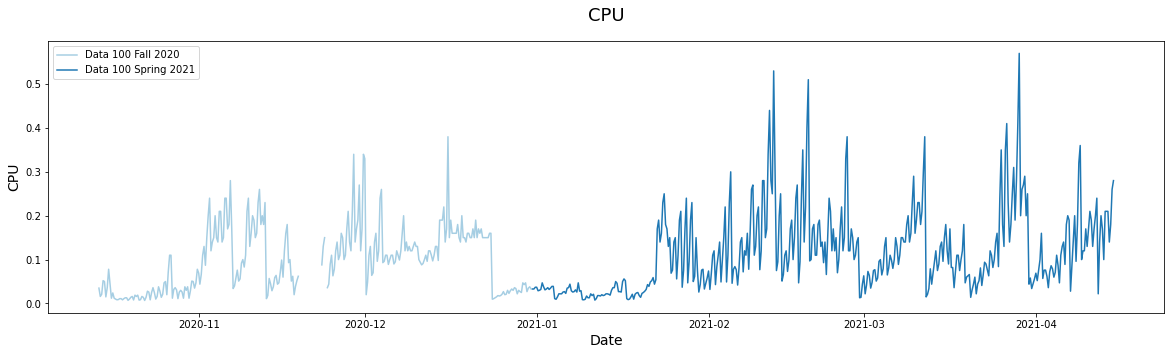

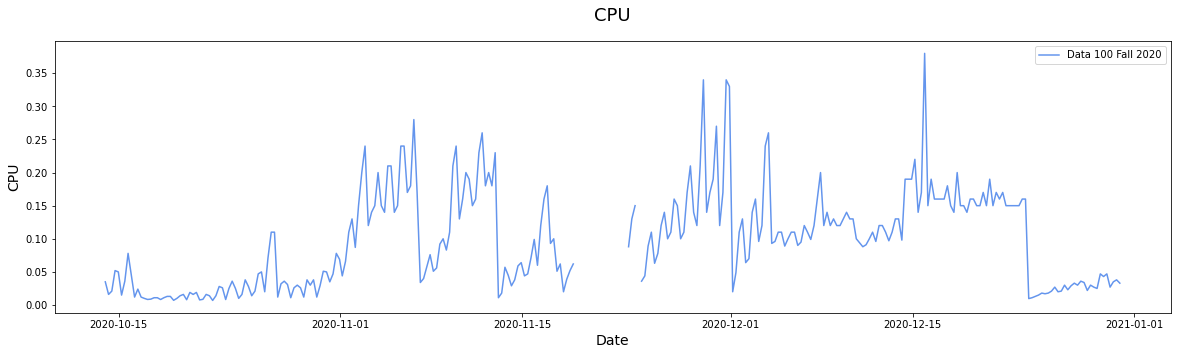

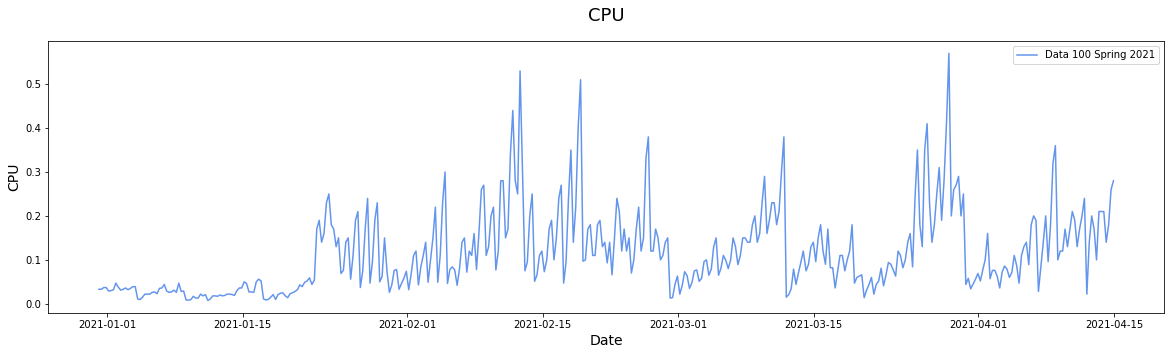

In [27]:
data100_path = '../data/grafana/data100hub/'
data100_cpu = pd.read_csv(data100_path + 'data100_cpu.csv')

courses = split_fasp(data100_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

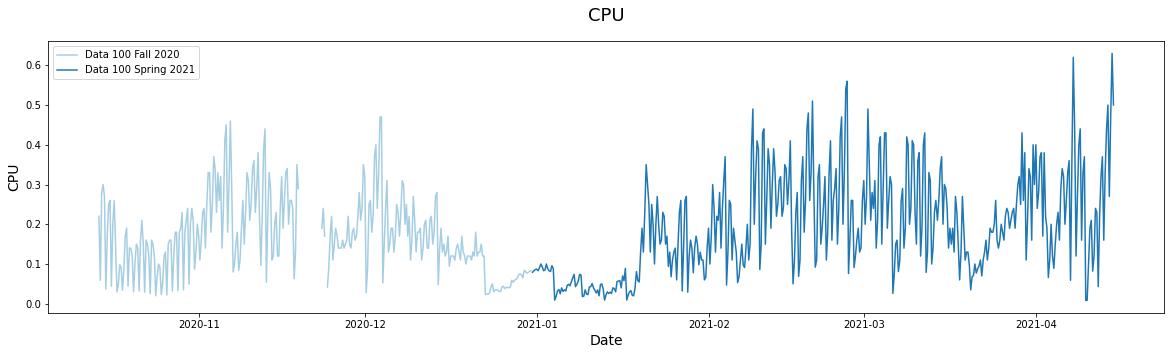

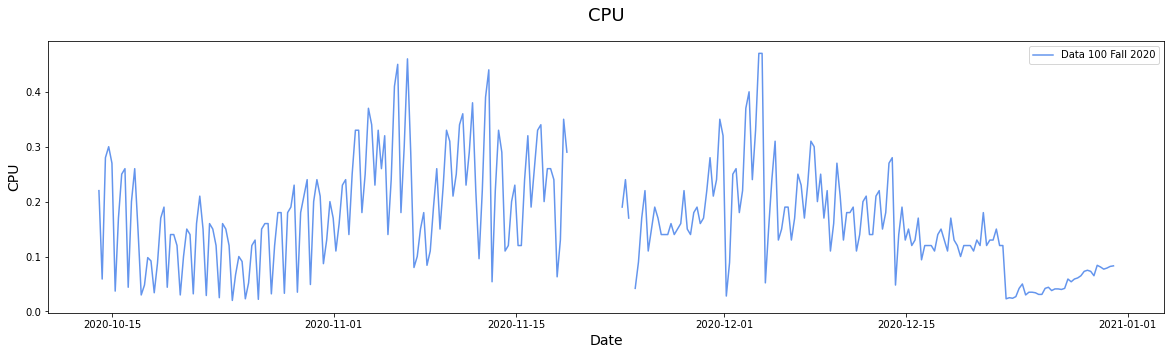

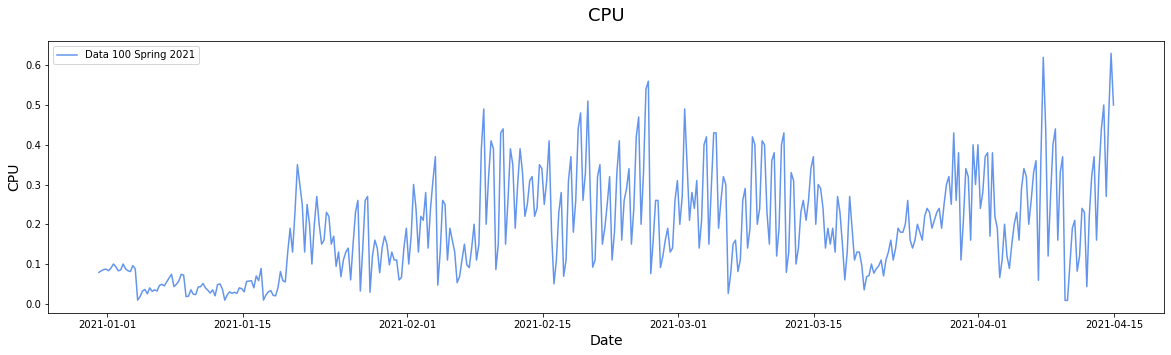

In [28]:
datahub_path = '../data/grafana/datahub/'
datahub_cpu = pd.read_csv(datahub_path + 'datahub_cpu.csv')

courses = split_fasp(datahub_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

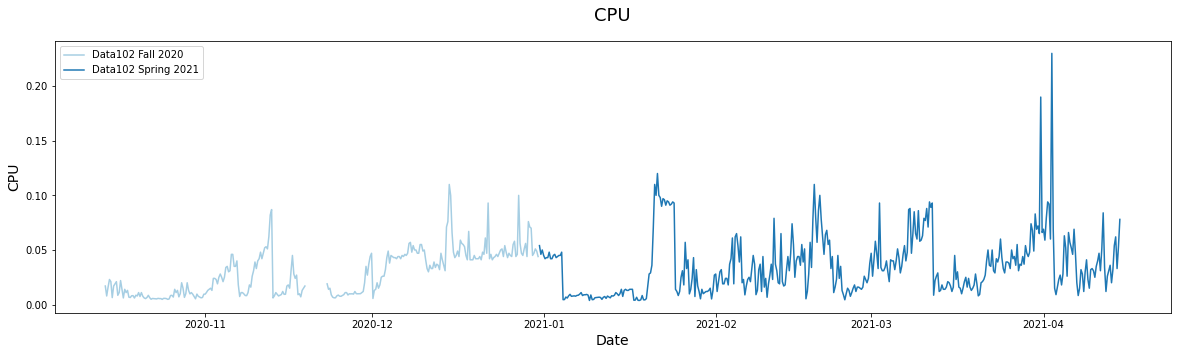

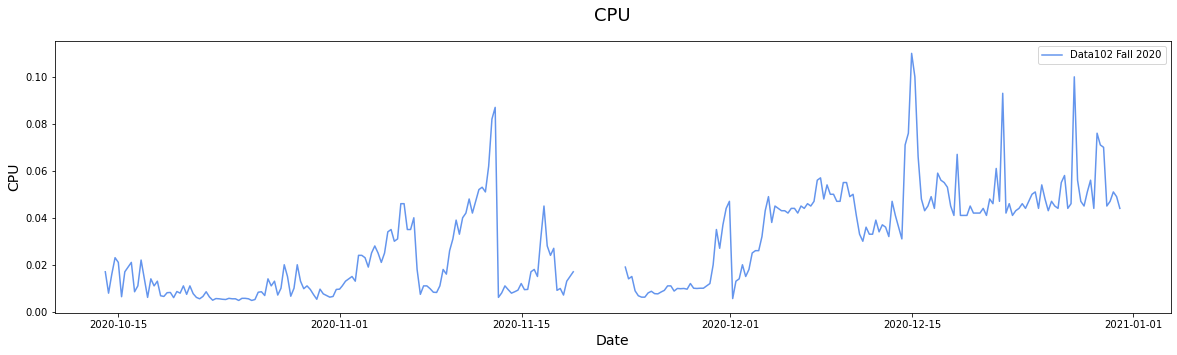

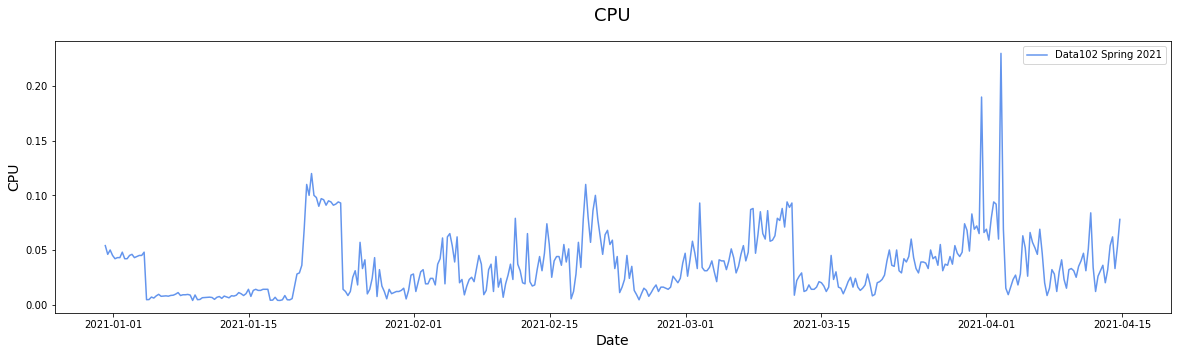

In [29]:
data102_path = '../data/grafana/data102hub/'
data102_cpu = pd.read_csv(data102_path + "data102_cpu.csv")

courses = split_fasp(data102_cpu)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

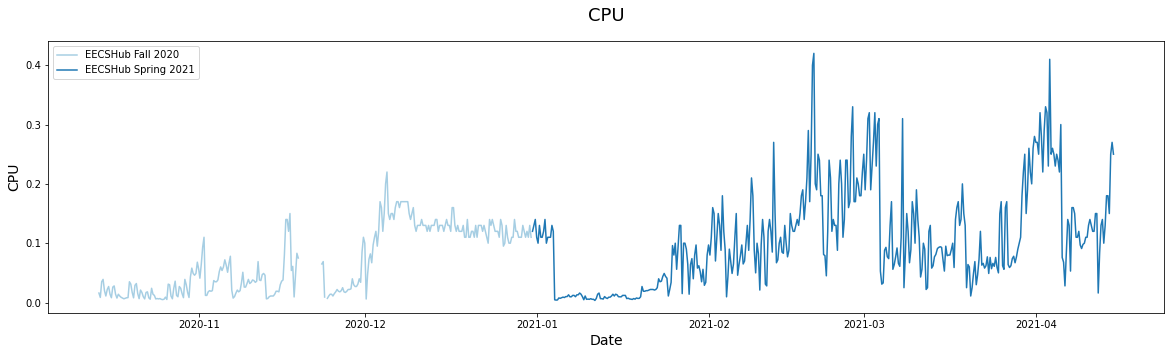

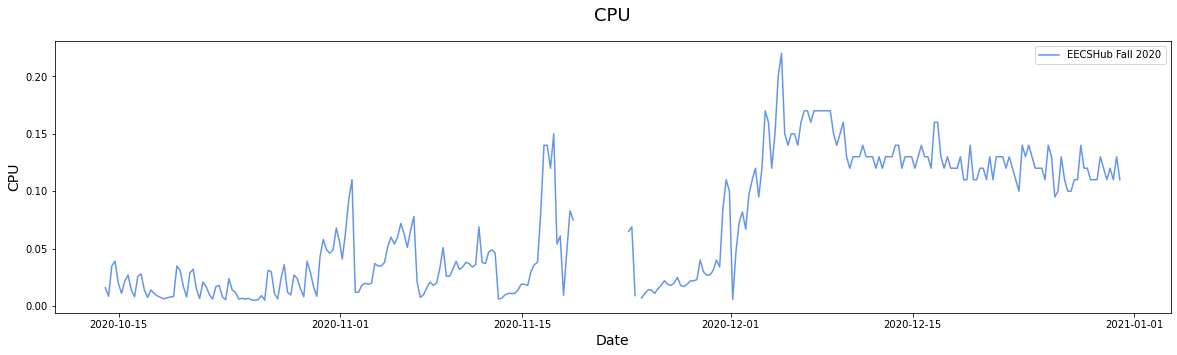

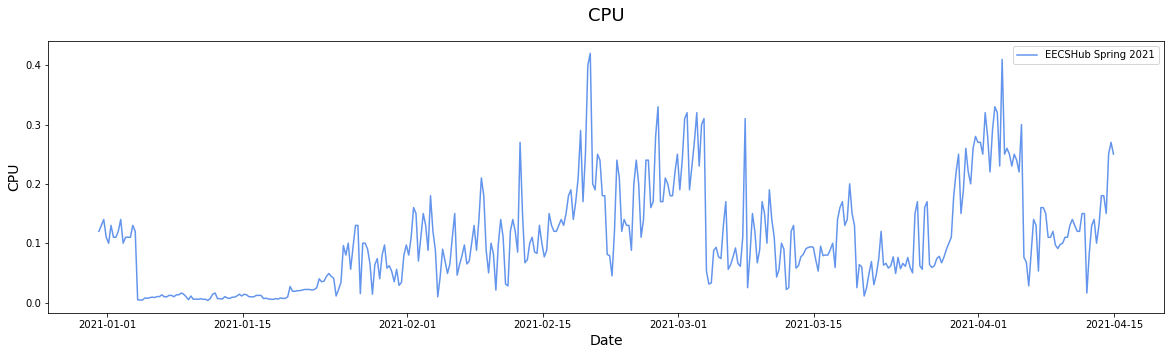

In [30]:
eecs_path = '../data/grafana/eecshub/'
eecs_cpu = pd.read_csv(eecs_path + "eecs_cpu.csv")

courses = split_fasp(eecs_cpu)
names = ["EECSHub Fall 2020", "EECSHub Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

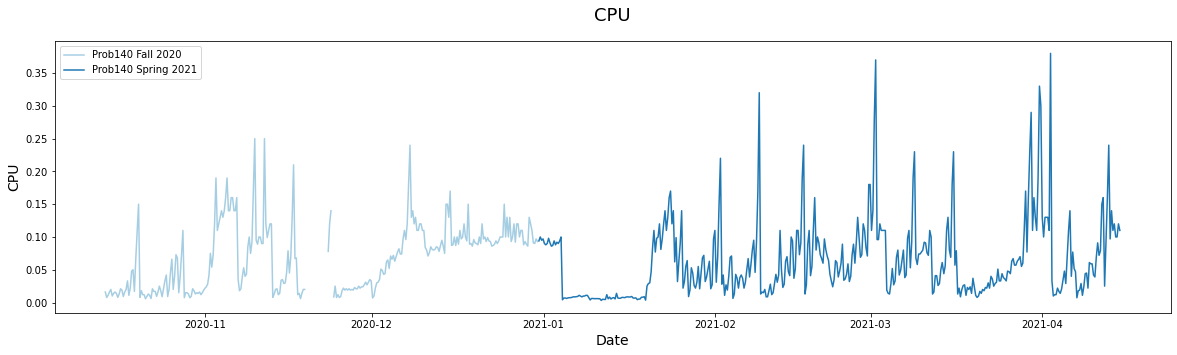

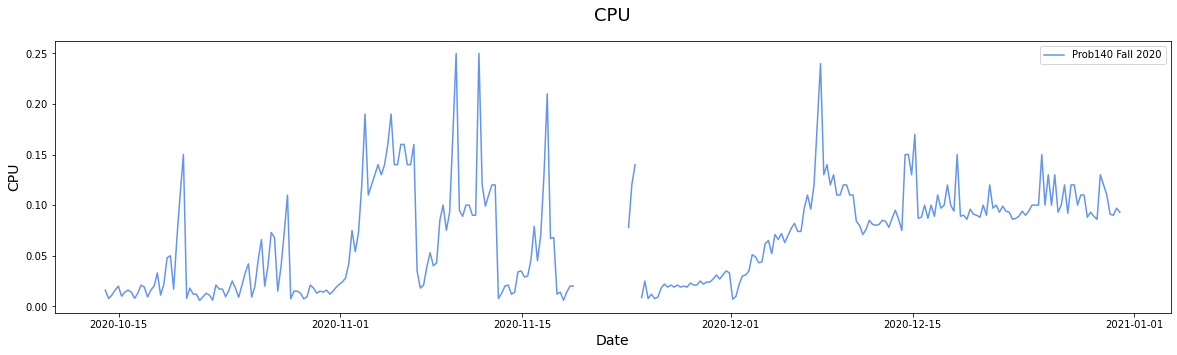

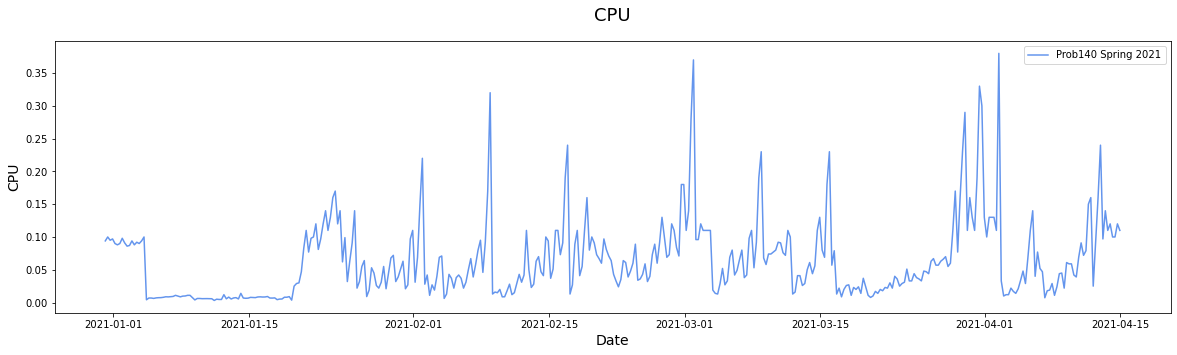

In [31]:
prob140_path = '../data/grafana/prob140hub/'
prob140_cpu = pd.read_csv(prob140_path + "prob140_cpu.csv")

courses = split_fasp(prob140_cpu)
names = ["Prob140 Fall 2020", "Prob140 Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

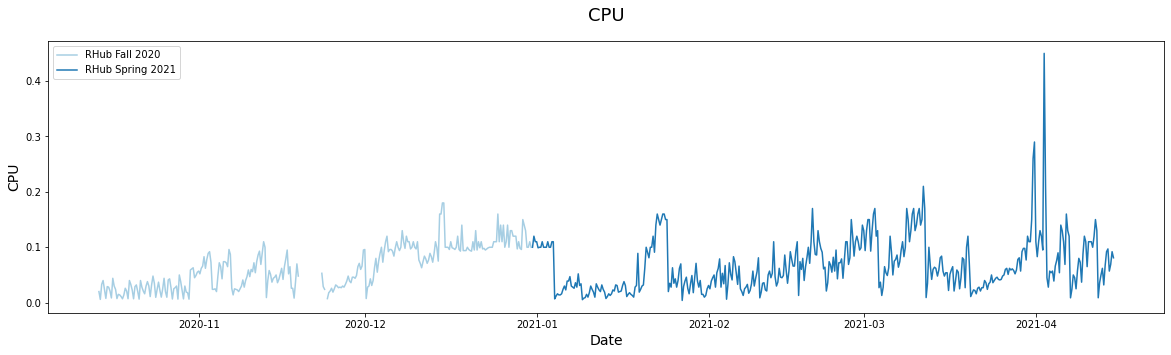

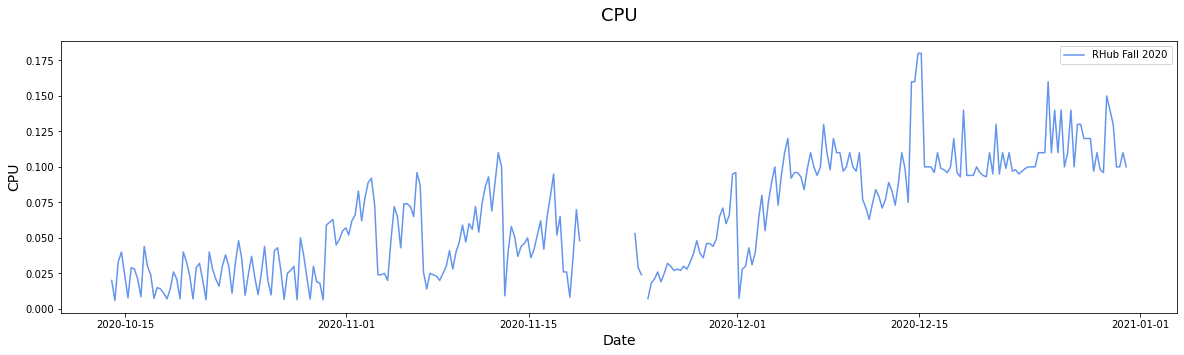

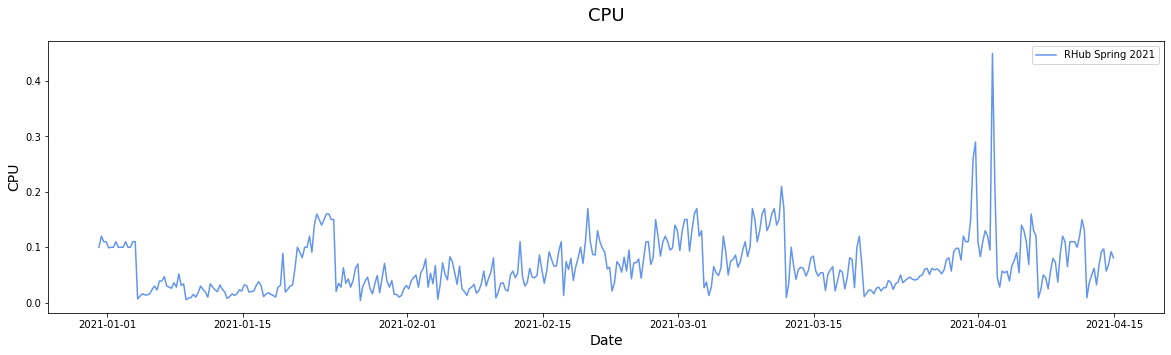

In [32]:
rhub_path = '../data/grafana/rhub/'
rhub_cpu = pd.read_csv(rhub_path + "rhub_cpu.csv")

courses = split_fasp(rhub_cpu)
names = ["RHub Fall 2020", "RHub Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

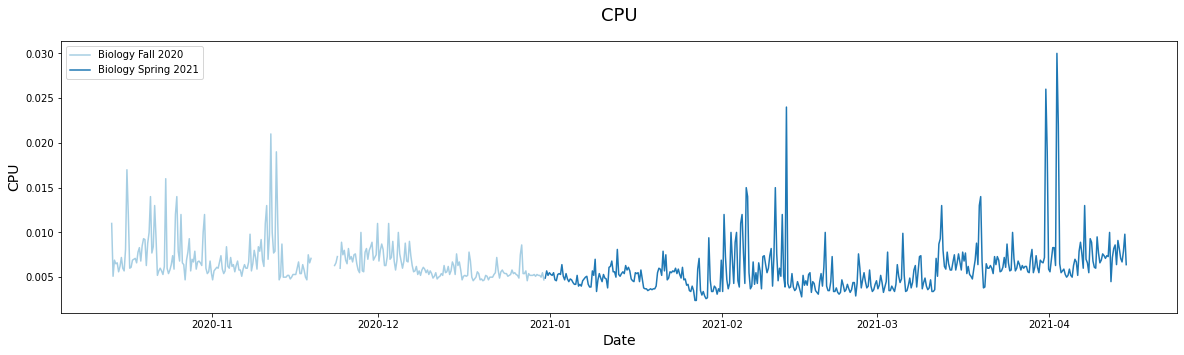

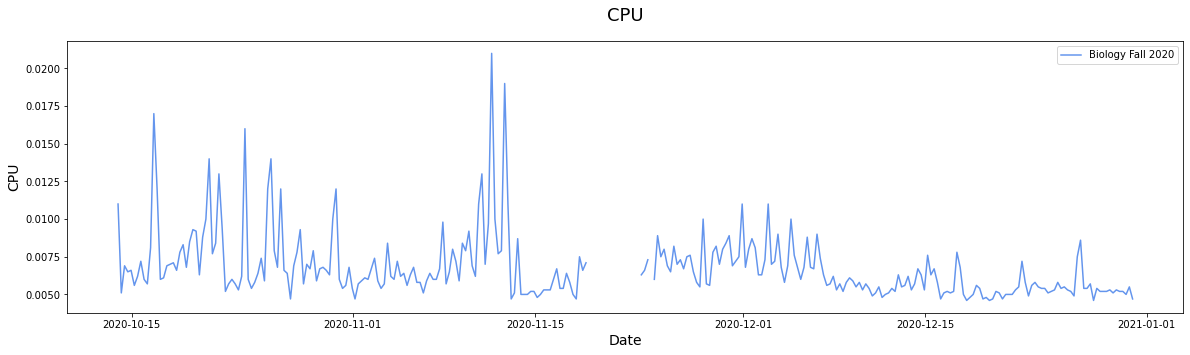

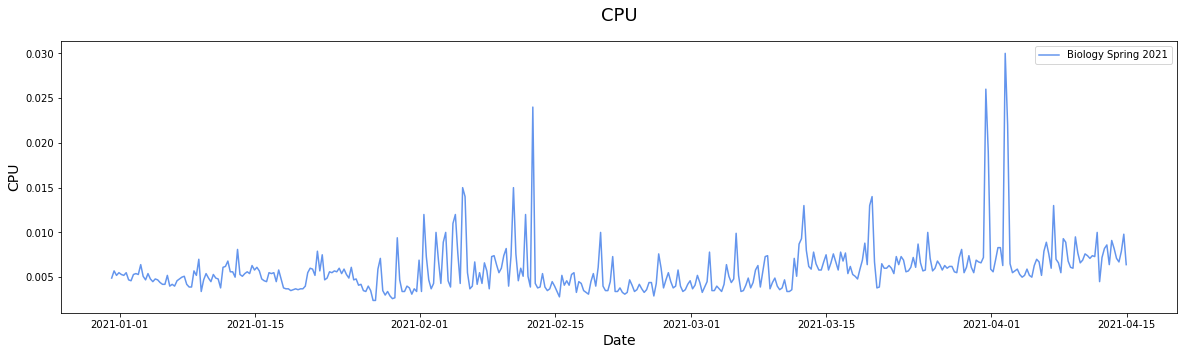

In [33]:
biology_path = '../data/grafana/biology/'
biology_cpu = pd.read_csv(biology_path + "biology_cpu.csv")

courses = split_fasp(biology_cpu)
names = ["Biology Fall 2020", "Biology Spring 2021"]

plot_cpu(courses, names)
plot_cpu_single(courses[0], names[0])
plot_cpu_single(courses[1], names[1])

<ipython-input-34-5a3321d59205>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  courses = np.array([item for sublist in agg for item in sublist])


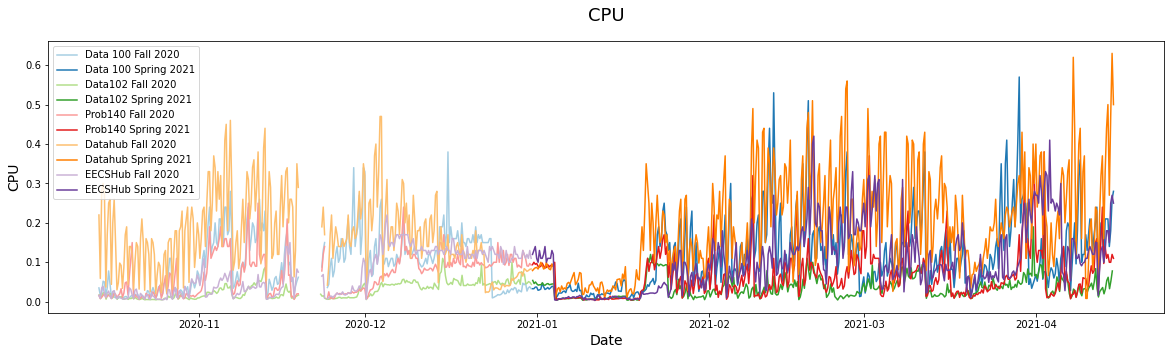

In [34]:
agg = split_fasp(data100_cpu), split_fasp(data102_cpu), split_fasp(prob140_cpu), split_fasp(datahub_cpu), split_fasp(eecs_cpu) # split_fasp(rhub_cpu), split_fasp(biology_cpu)
courses = np.array([item for sublist in agg for item in sublist])
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_cpu(courses, names)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


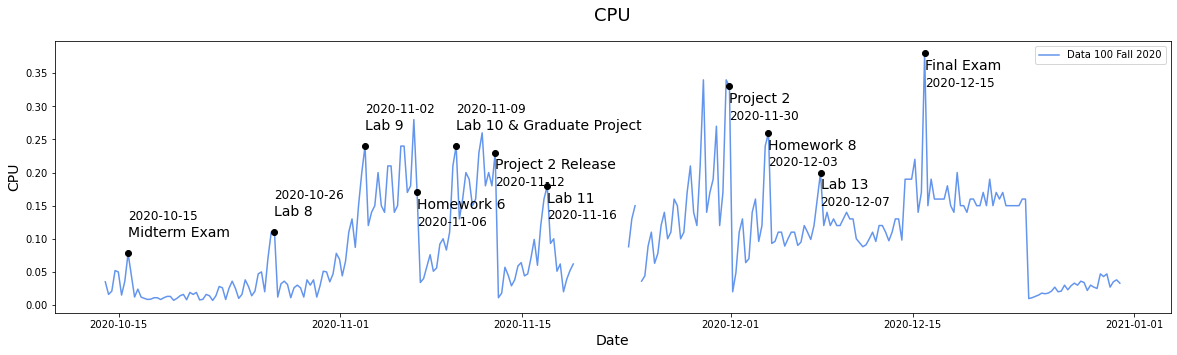

In [35]:
offset = 0.025
data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_value(data100_cpu, date) for date in data100_dates],
    'label': ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Project 2 Release', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam'],
    'offset': [offset, offset, offset, -offset, offset, -offset, -offset, -offset, -offset, -offset, -offset, -offset]
})

plot_cpu_annotations(courses[0], names[0], data100_annotations)

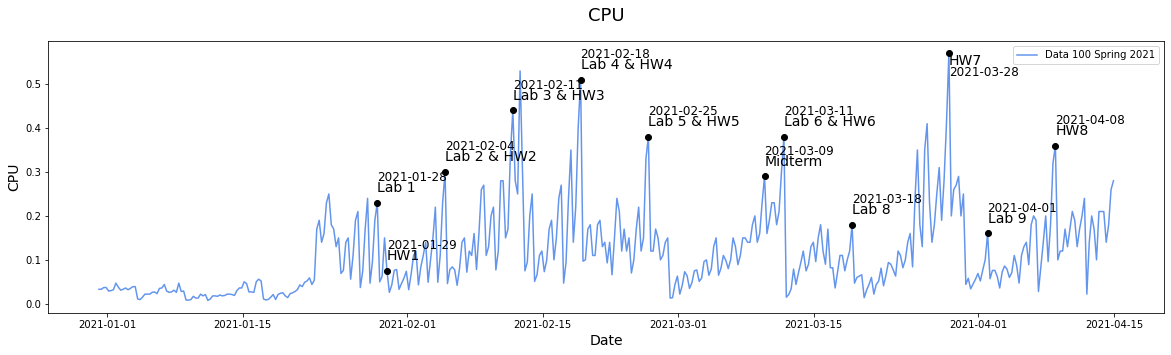

In [36]:
offset = 0.025

data100_springannotations = pd.DataFrame({
    'x': data100_springdates,
    'y': [return_value(data100_cpu, date) for date in data100_springdates],
    'label': ['Lab 1', 'HW1', 'Lab 2 & HW2', 'Lab 3 & HW3', 'Lab 4 & HW4', 
              'Lab 5 & HW5', 'Midterm', 'Lab 6 & HW6', 'Lab 8', 'HW7', 'Lab 9', 'HW8'],
    'offset': [offset, offset, offset, offset, offset, offset, offset, offset, offset, -offset, offset, offset]
})

plot_cpu_annotations(courses[1], names[1], data100_springannotations)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


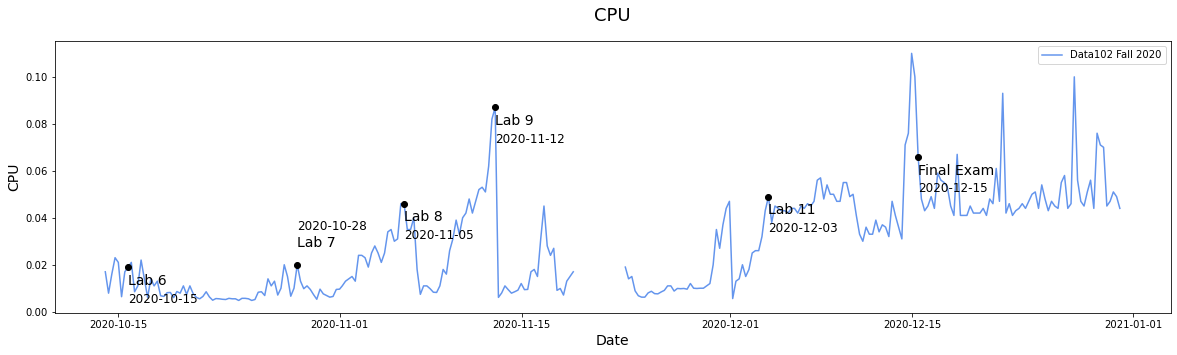

In [37]:
offset = 0.0075

data102_fallannotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_value(data102_cpu, date) for date in data102_fall],
    'label': ['Lab 6', 'Lab 7', 'Lab 8', 'Lab 9', 'Lab 10', 'Lab 11', 'Final Exam'],
    'offset': [-offset, offset, -offset, -offset, -offset, -offset, -offset]
})
plot_cpu_annotations(courses[2], names[2], data102_fallannotations)

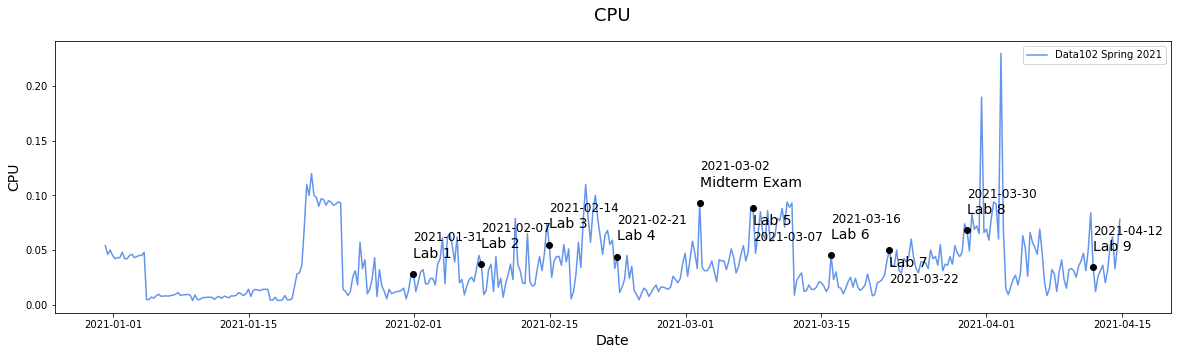

In [38]:
offset = 0.015
data102_springannotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_value(data102_cpu, date) for date in data102_spring],
    'label': ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4', 'Midterm Exam', 'Lab 5', 'Lab 6', 'Lab 7', 'Lab 8', 'Lab 9'],
    'offset': [offset, offset, offset, offset, offset, -offset, offset, -offset, offset, offset]
})
plot_cpu_annotations(courses[3], names[3], data102_springannotations)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


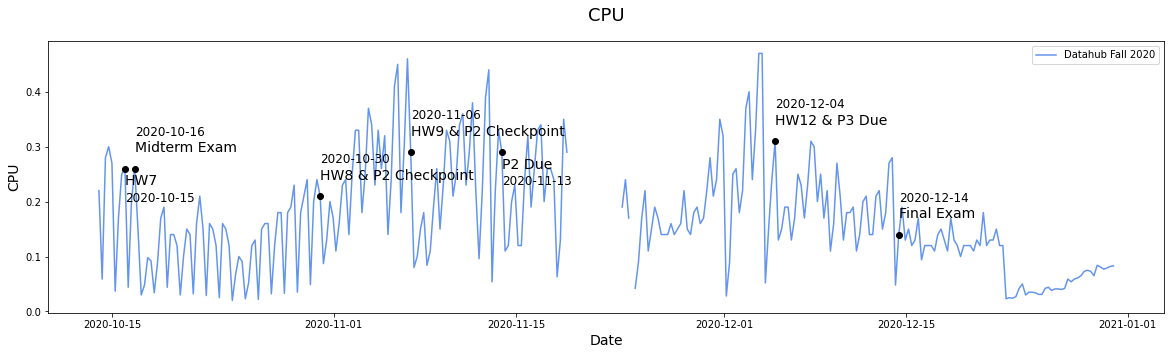

In [39]:
offset = 0.03
datahub_fallannotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_value(datahub_cpu, date) for date in datahub_fall],
    'label': ['HW7', 'Midterm Exam', 'HW8 & P2 Checkpoint', 'HW9 & P2 Checkpoint', 'P2 Due', 'HW11', 'HW12 & P3 Due', 'Final Exam'],
    'offset': [-offset, offset, offset, offset, -offset, offset, offset, offset]
})
plot_cpu_annotations(courses[6], names[6], datahub_fallannotations)

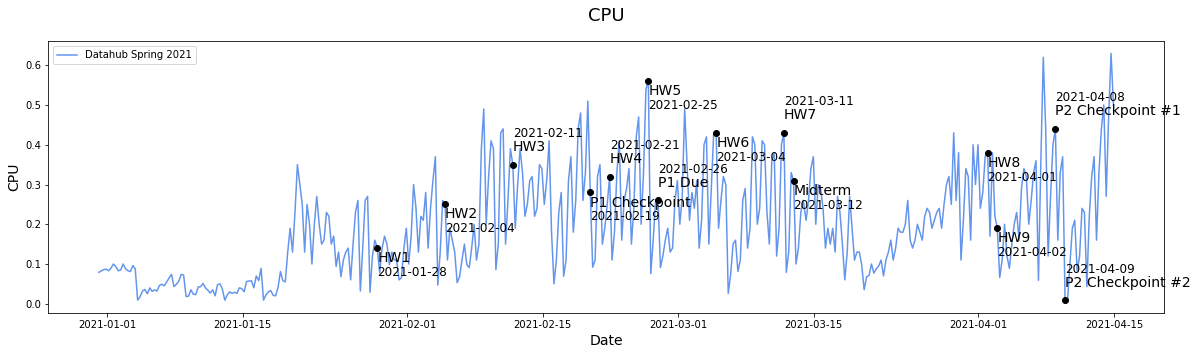

In [40]:
offset = 0.035
datahub_springannotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_value(datahub_cpu, date) for date in datahub_spring],
    'label': ['HW1', 'HW2', 'HW3', 'P1 Checkpoint', 'HW4', 'HW5', 'P1 Due', 'HW6', 'HW7', 'Midterm', 'HW8', 'HW9', 'P2 Checkpoint #1', 'P2 Checkpoint #2'],
    'offset': [-offset, -offset, offset, -offset, offset, -offset, offset, -offset, offset, -offset, -offset, -offset, offset, offset]
})
plot_cpu_annotations(courses[7], names[7], datahub_springannotations)

# Memory Usage
This section visualizes the memory usage at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

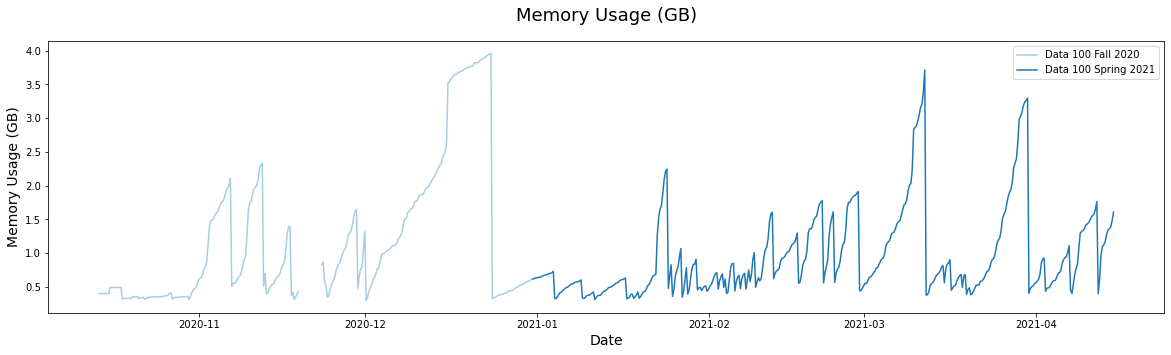

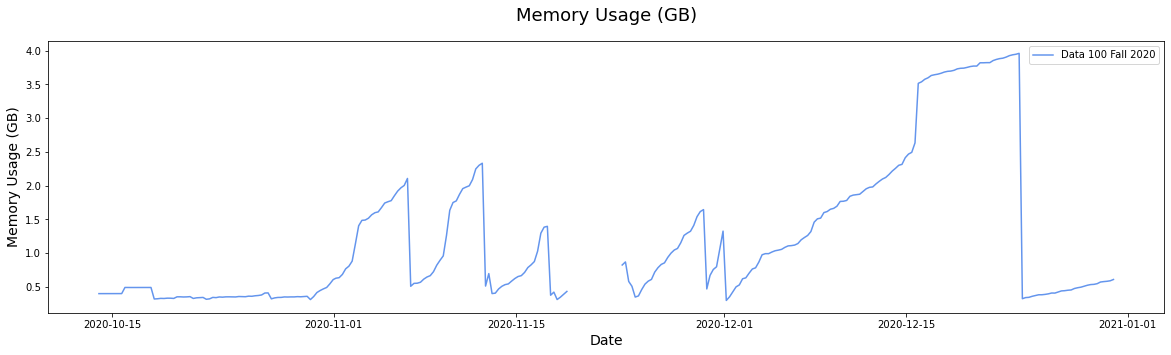

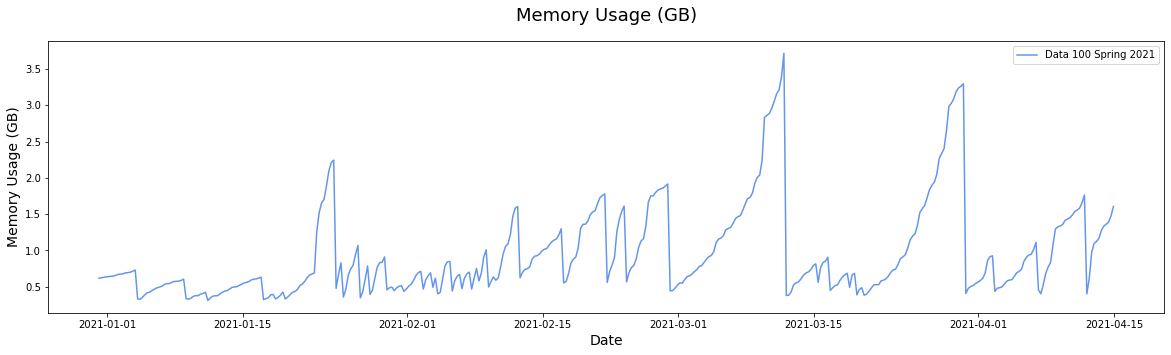

In [41]:
data100_path = '../data/grafana/data100hub/'
data100_memory = pd.read_csv(data100_path + 'data100_memory.csv')

courses = split_fasp(data100_memory)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

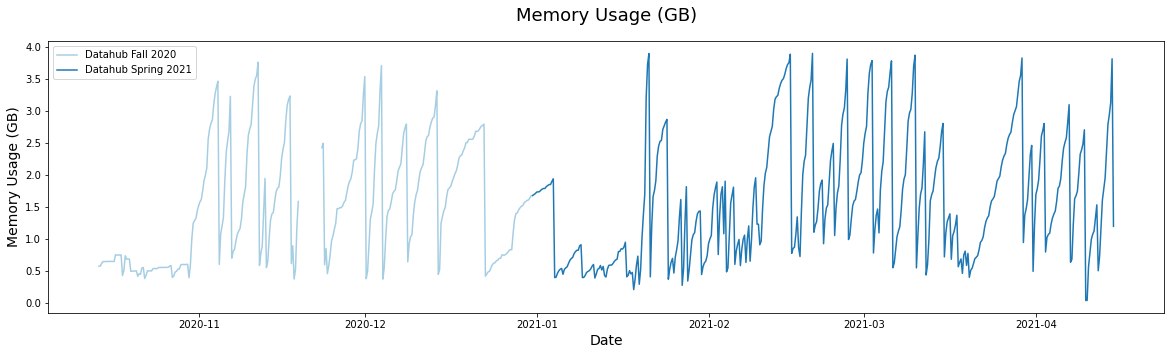

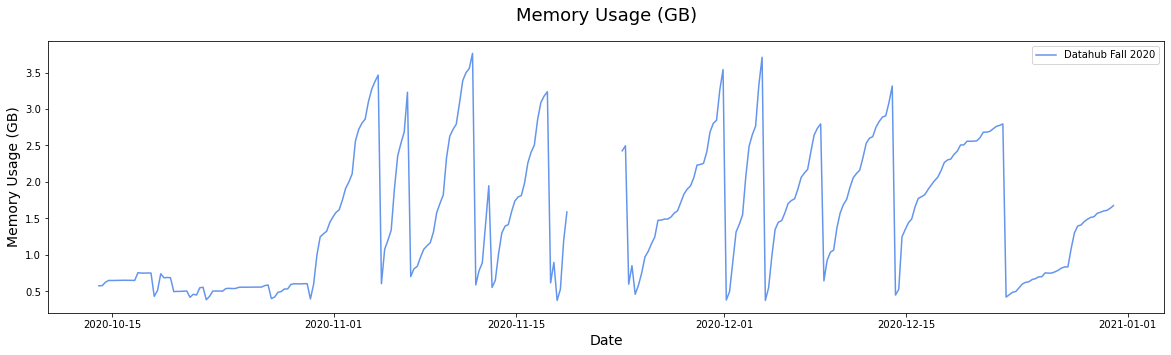

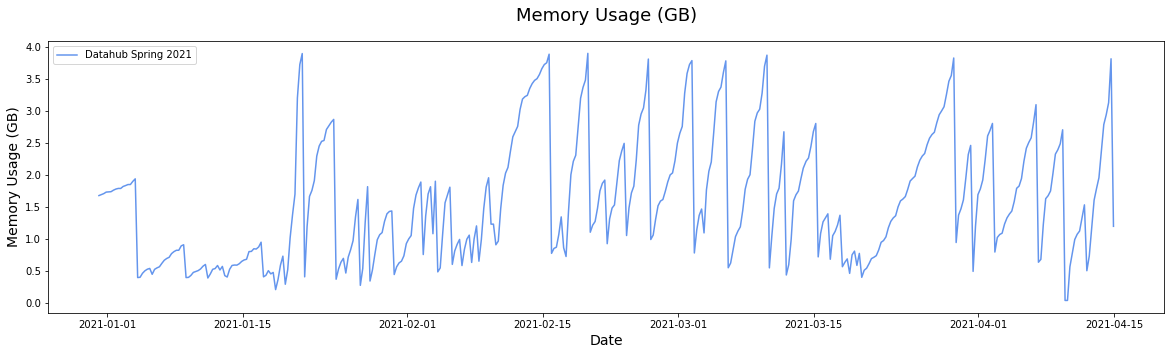

In [42]:
datahub_path = '../data/grafana/datahub/'
datahub_memory = pd.read_csv(datahub_path + 'datahub_memory.csv')

courses = split_fasp(datahub_memory)
names = ["Datahub Fall 2020", "Datahub Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

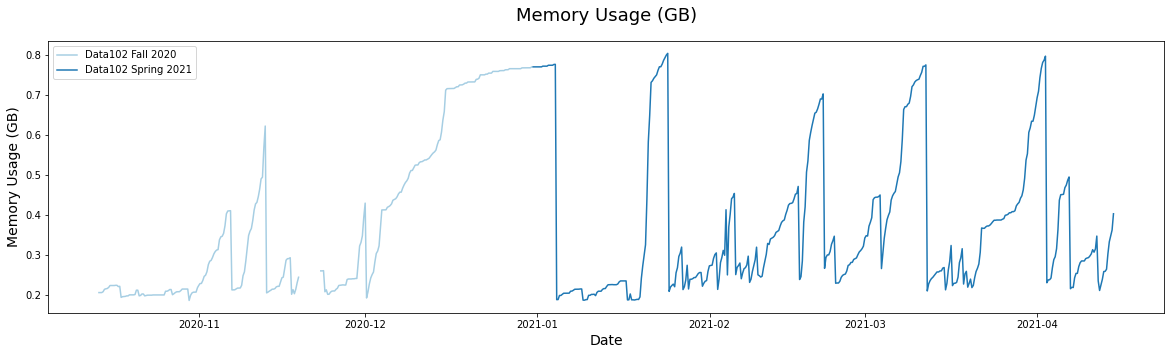

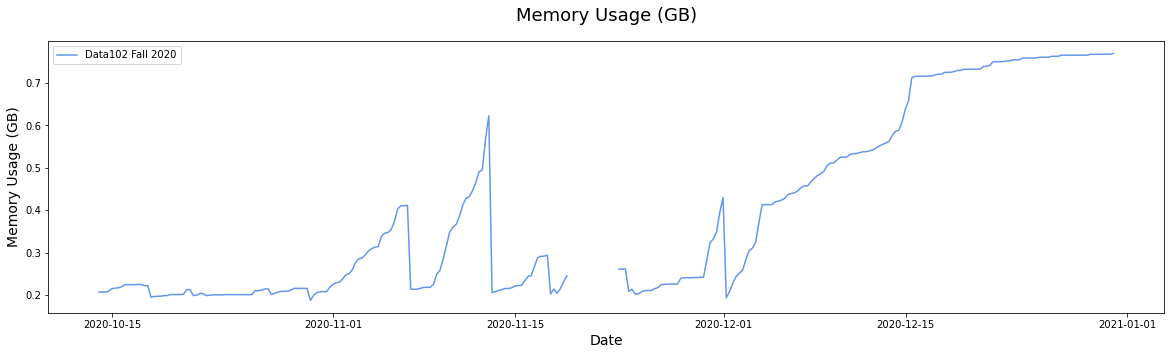

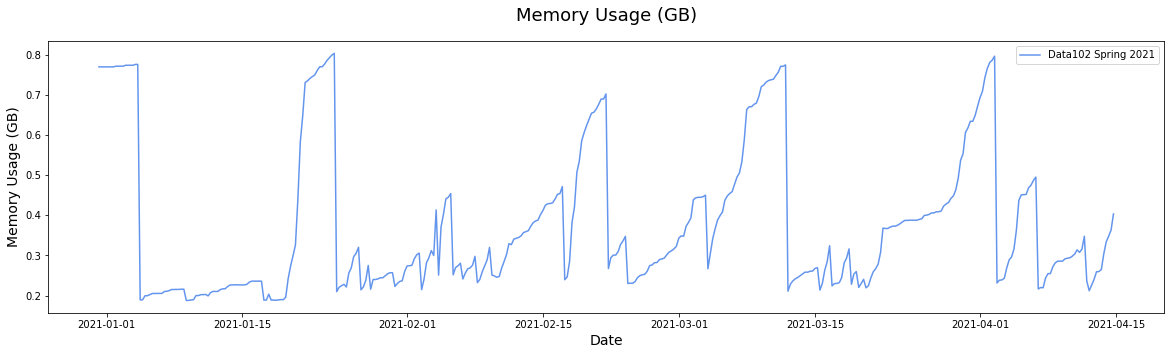

In [43]:
data102_path = '../data/grafana/data102hub/'
data102_memory = pd.read_csv(data102_path + "data102_memory.csv")

courses = split_fasp(data102_memory)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

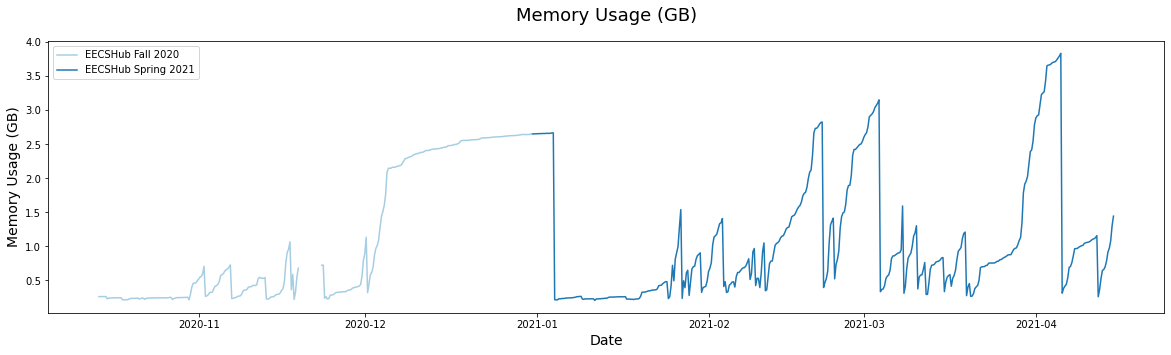

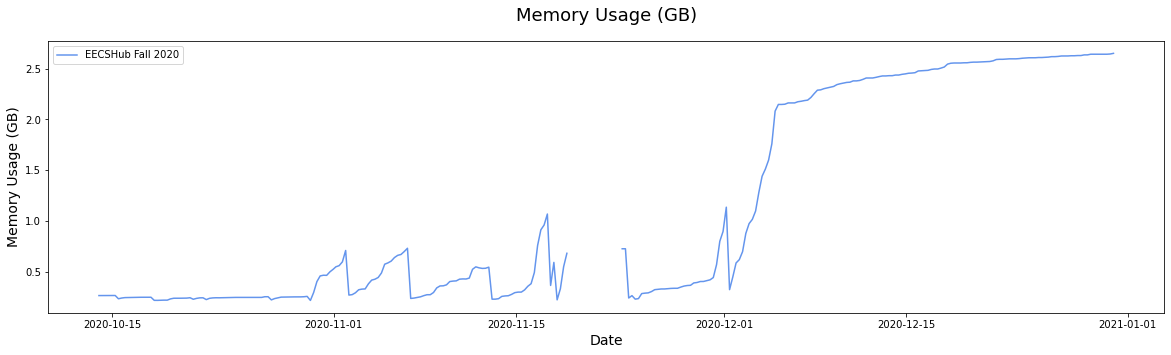

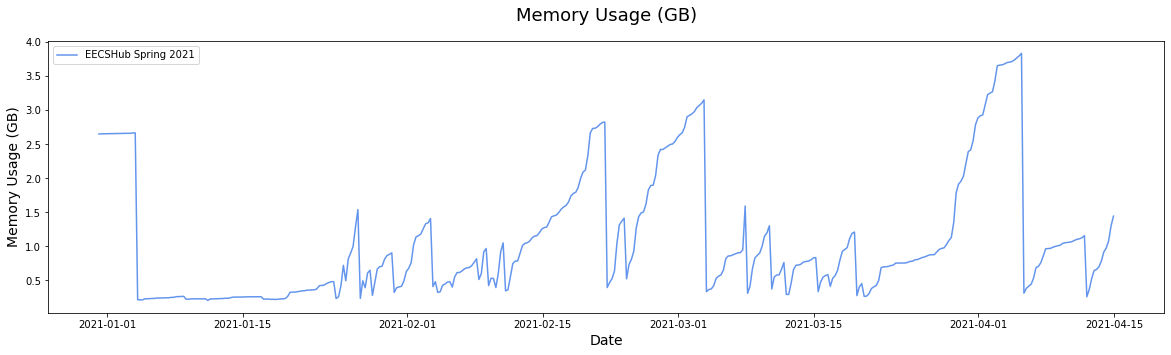

In [44]:
eecs_path = '../data/grafana/eecshub/'
eecs_memory = pd.read_csv(eecs_path + "eecs_memory.csv")

courses = split_fasp(eecs_memory)
names = ["EECSHub Fall 2020", "EECSHub Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

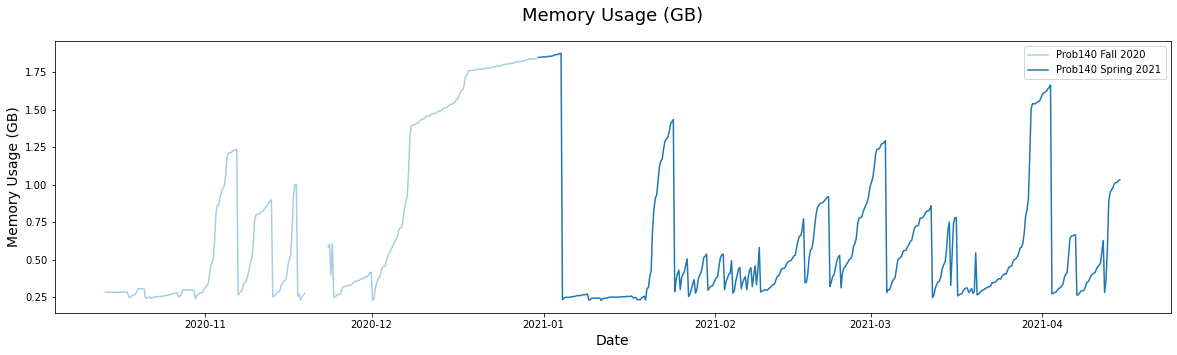

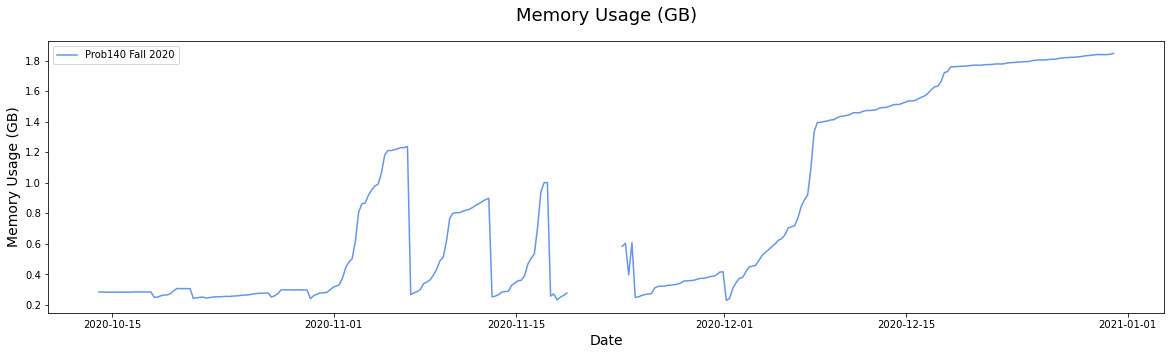

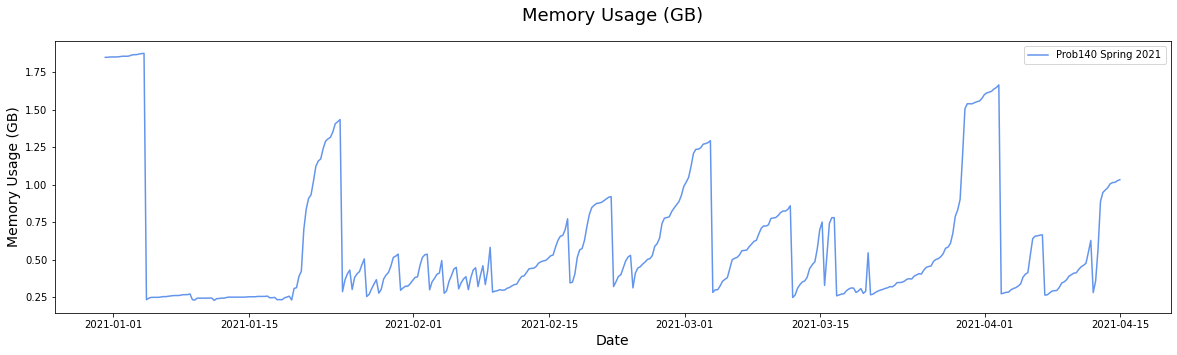

In [45]:
prob140_path = '../data/grafana/prob140hub/'
prob140_memory = pd.read_csv(prob140_path + "prob140_memory.csv")

courses = split_fasp(prob140_memory)
names = ["Prob140 Fall 2020", "Prob140 Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

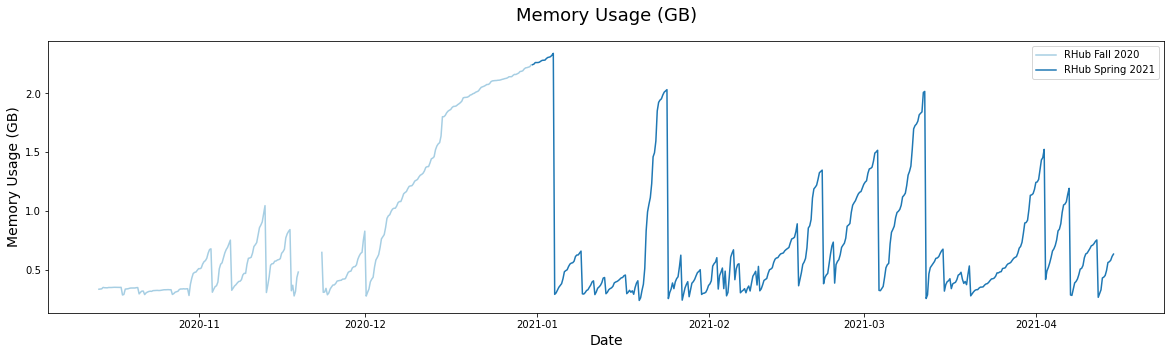

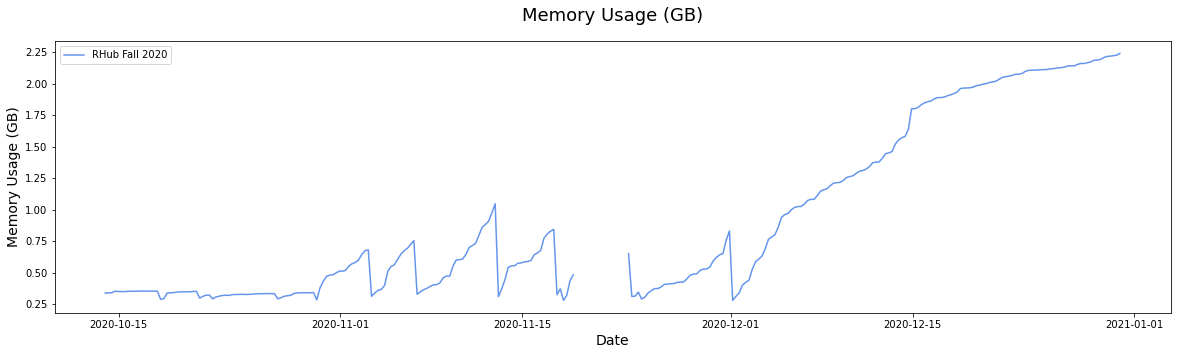

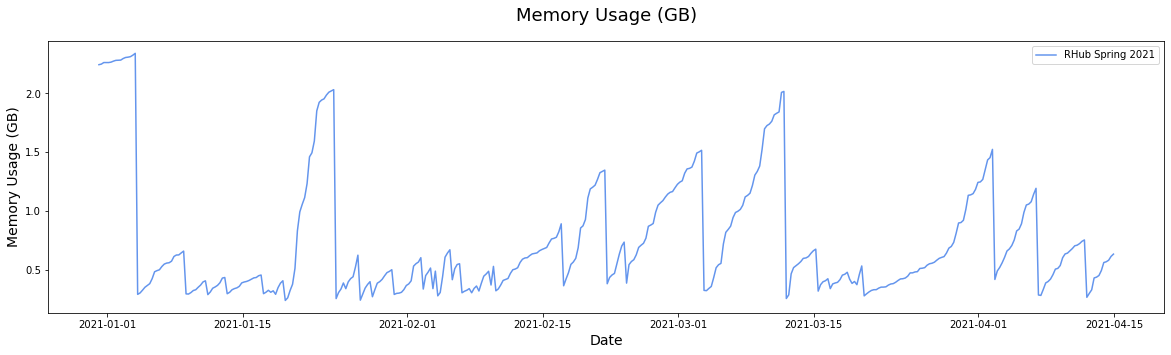

In [46]:
rhub_path = '../data/grafana/rhub/'
rhub_memory = pd.read_csv(rhub_path + "rhub_memory.csv")

courses = split_fasp(rhub_memory)
names = ["RHub Fall 2020", "RHub Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

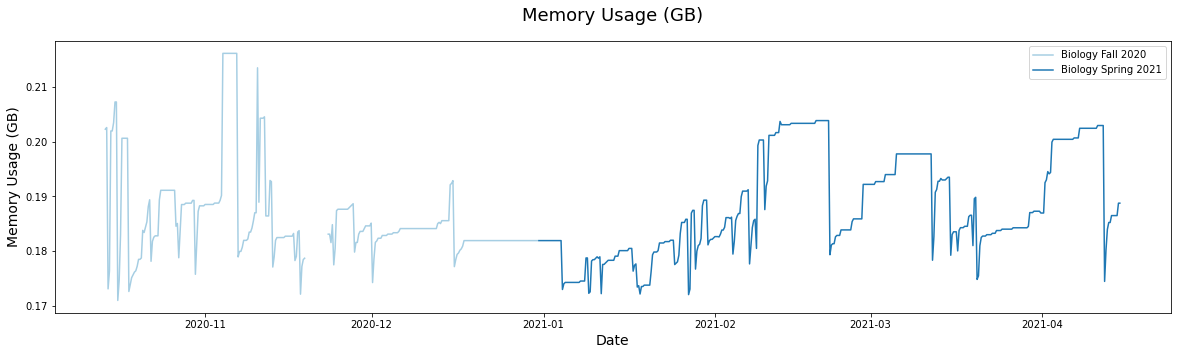

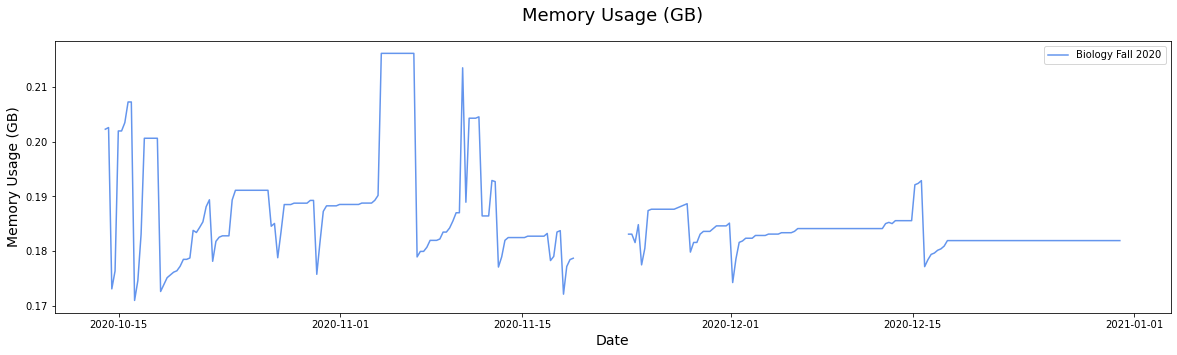

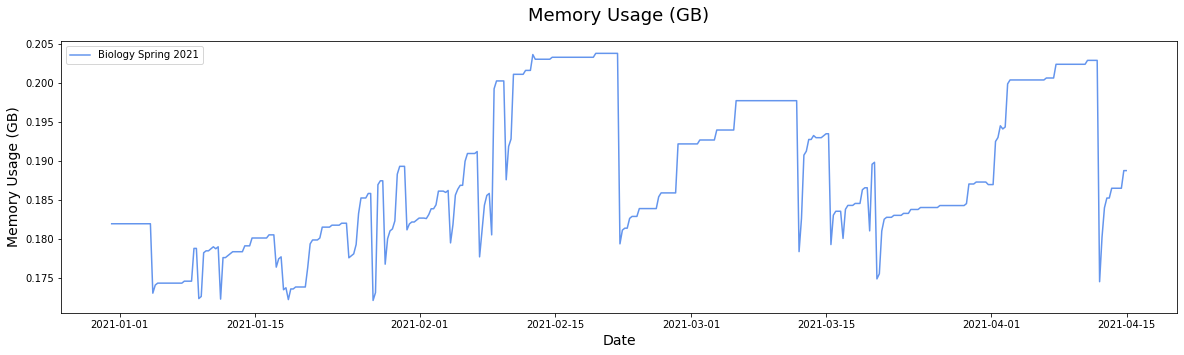

In [47]:
biology_path = '../data/grafana/biology/'
biology_memory = pd.read_csv(biology_path + "biology_memory.csv")

courses = split_fasp(biology_memory)
names = ["Biology Fall 2020", "Biology Spring 2021"]

plot_cpu(courses, names, memory=True)
plot_cpu_single(courses[0], names[0], memory=True)
plot_cpu_single(courses[1], names[1], memory=True)

<ipython-input-48-a455bfd1095e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  courses = np.array([item for sublist in agg for item in sublist])


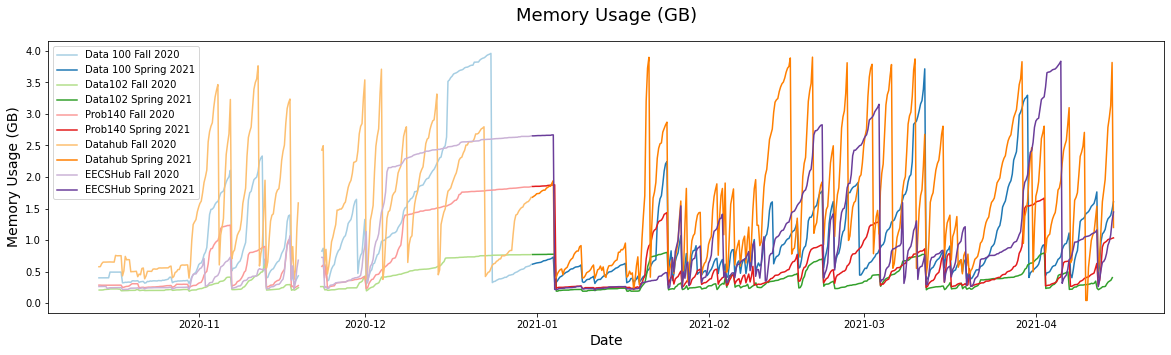

In [48]:
agg = split_fasp(data100_memory), split_fasp(data102_memory), split_fasp(prob140_memory), split_fasp(datahub_memory), split_fasp(eecs_memory) # split_fasp(rhub_cpu), split_fasp(biology_cpu)
courses = np.array([item for sublist in agg for item in sublist])
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_cpu(courses, names, memory=True)

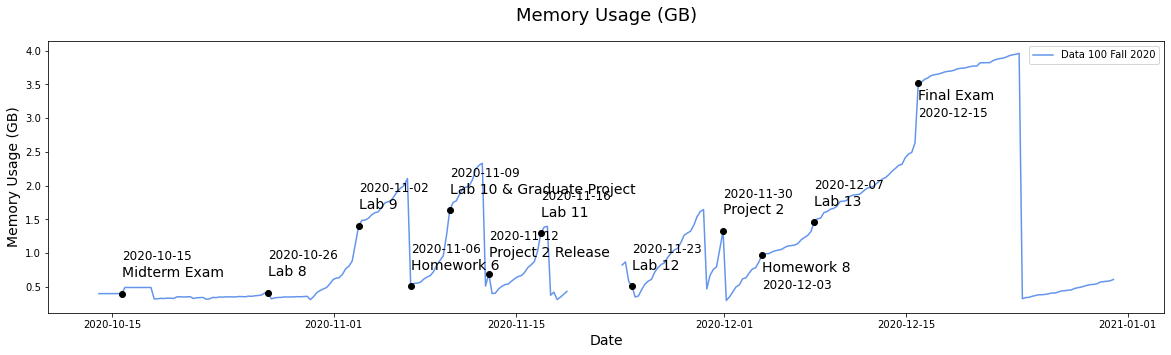

In [49]:
offset = 0.25
data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_value(data100_memory, date) * 1.0 / (2 ** 30) for date in data100_dates],
    'label': ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Project 2 Release', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam'],
    'offset': [offset, offset, offset, offset, offset, offset, offset, offset, offset, -offset, offset, -offset]
})

plot_memory_annotations(courses[0], names[0], data100_annotations)

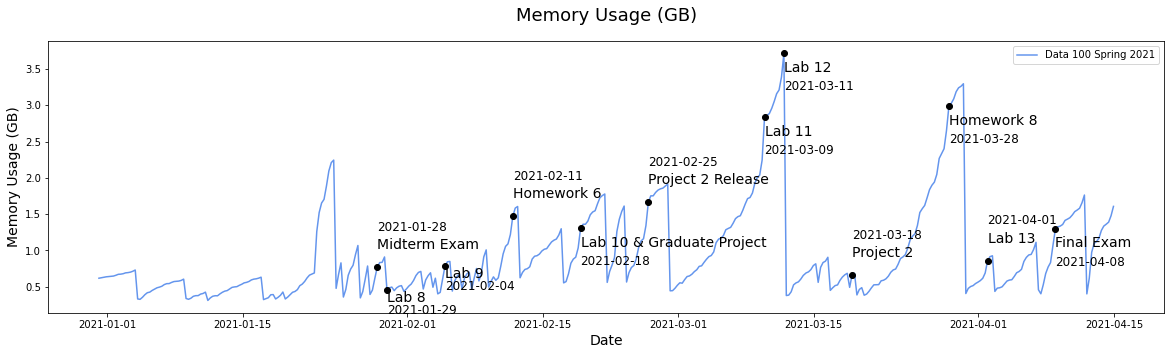

In [50]:
offset = 0.25
data100_annotations = pd.DataFrame({
    'x': data100_springdates,
    'y': [return_value(data100_memory, date) * 1.0 / (2 ** 30) for date in data100_springdates],
    'label': ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Project 2 Release', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam'],
    'offset': [offset, -offset/1.5, -offset/1.5, offset, -offset, offset, -offset, -offset, offset, -offset, offset, -offset]
})

plot_memory_annotations(courses[1], names[1], data100_annotations)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


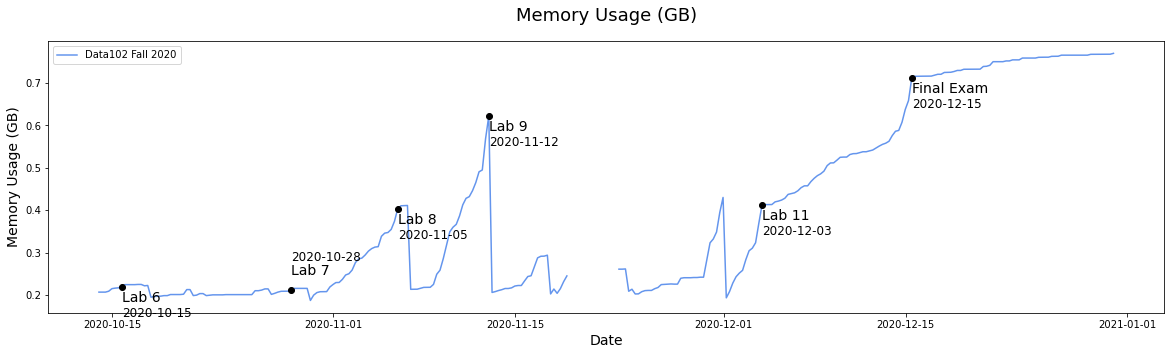

In [51]:
offset = 0.035
data102_annotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_value(data102_memory, date) * 1.0 / (2 ** 30) for date in data102_fall],
    'label': ['Lab 6', 'Lab 7', 'Lab 8', 'Lab 9', 'Lab 10', 'Lab 11', 'Final Exam'],
    'offset': [-offset, offset, -offset, -offset, -offset, -offset, -offset]
})

plot_memory_annotations(courses[2], names[2], data102_annotations)

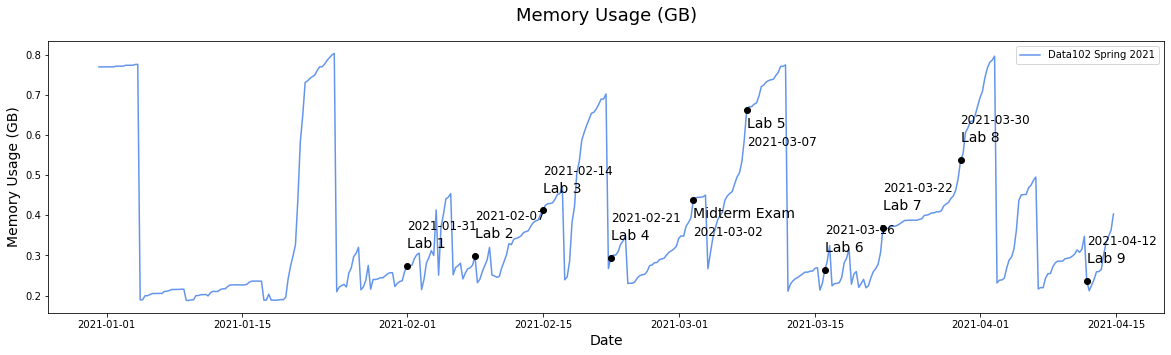

In [52]:
offset = 0.045
data102_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_value(data102_memory, date) * 1.0 / (2 ** 30) for date in data102_spring],
    'label': ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4', 'Midterm Exam', 'Lab 5', 'Lab 6', 'Lab 7', 'Lab 8', 'Lab 9'],
    'offset': [offset, offset, offset, offset, -offset, -offset, offset, offset, offset, offset]
})

plot_memory_annotations(courses[3], names[3], data102_annotations)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


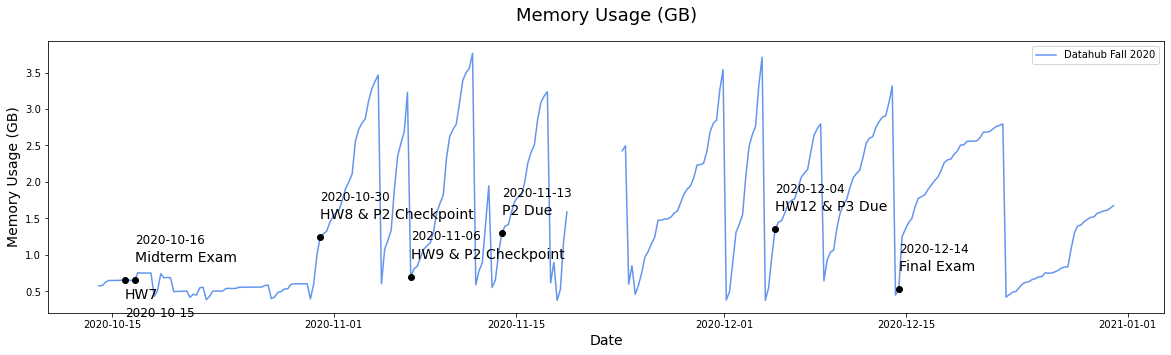

In [53]:
offset = 0.25
datahub_fallannotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_value(datahub_memory, date) * 1.0 / (2 ** 30) for date in datahub_fall],
    'label': ['HW7', 'Midterm Exam', 'HW8 & P2 Checkpoint', 'HW9 & P2 Checkpoint', 'P2 Due', 'HW11', 'HW12 & P3 Due', 'Final Exam'],
    'offset': [-offset, offset, offset, offset, offset, offset, offset, offset]
})
plot_memory_annotations(courses[6], names[6], datahub_fallannotations)

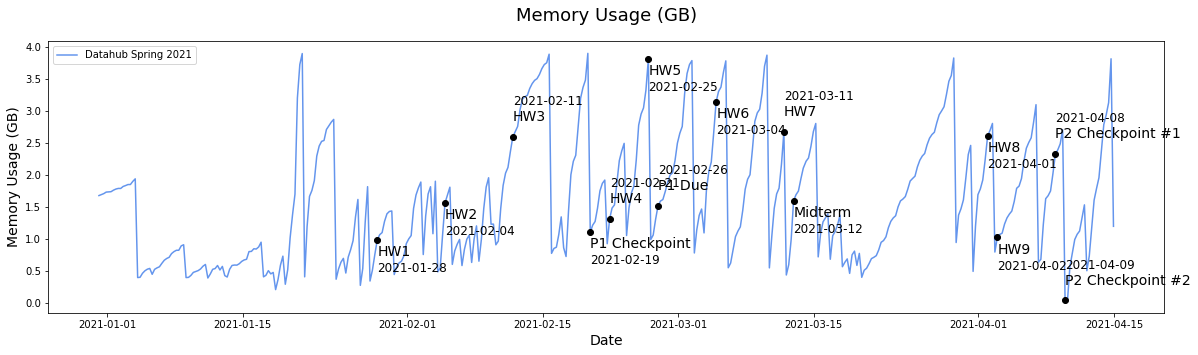

In [54]:
offset = 0.25
datahub_springannotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_value(datahub_memory, date) * 1.0 / (2 ** 30) for date in datahub_spring],
    'label': ['HW1', 'HW2', 'HW3', 'P1 Checkpoint', 'HW4', 'HW5', 'P1 Due', 'HW6', 'HW7', 'Midterm', 'HW8', 'HW9', 'P2 Checkpoint #1', 'P2 Checkpoint #2'],
    'offset': [-offset, -offset, offset, -offset, offset, -offset, offset, -offset, offset, -offset, -offset, -offset, offset, offset]
})
plot_memory_annotations(courses[7], names[7], datahub_springannotations)